# Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

In [4]:
from helper import *
from time_analysis import *
import os
from __init__ import root_dir, data_path

# Data

In [4]:
%%capture
df = pd.read_csv(os.path.join(data_path,'clean','clean.csv'), parse_dates=['Timestamp'])

In [7]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46313 entries, 0 to 46312
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Timestamp                       46313 non-null  datetime64[ns]
 1   DK_1_imports                    46313 non-null  float64       
 2   SE_4_imports                    46313 non-null  float64       
 3   DK_1_exports                    46313 non-null  float64       
 4   SE_4_exports                    46313 non-null  float64       
 5   Day_Ahead_price                 46313 non-null  float64       
 6   Forecasted_Load                 46313 non-null  float64       
 7   Actual_Load                     46313 non-null  float64       
 8   Solar_[MW]                      46313 non-null  float64       
 9   ttf_price                       46313 non-null  float64       
 10  coal_price                      46313 non-null  float64       
 11  co

Index(['Timestamp', 'DK_1_imports', 'SE_4_imports', 'DK_1_exports',
       'SE_4_exports', 'Day_Ahead_price', 'Forecasted_Load', 'Actual_Load',
       'Solar_[MW]', 'ttf_price', 'coal_price', 'co2_price',
       'Biomass_Actual_Aggregated_[MW]', 'Waste_Actual_Aggregated_[MW]',
       'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Year', 'Quarter', 'Month',
       'Date', 'Day', 'Weekday', 'Hour', 'Week', 'business', 'Wind Total'],
      dtype='object')

# Time series analysis

# Day ahead market price

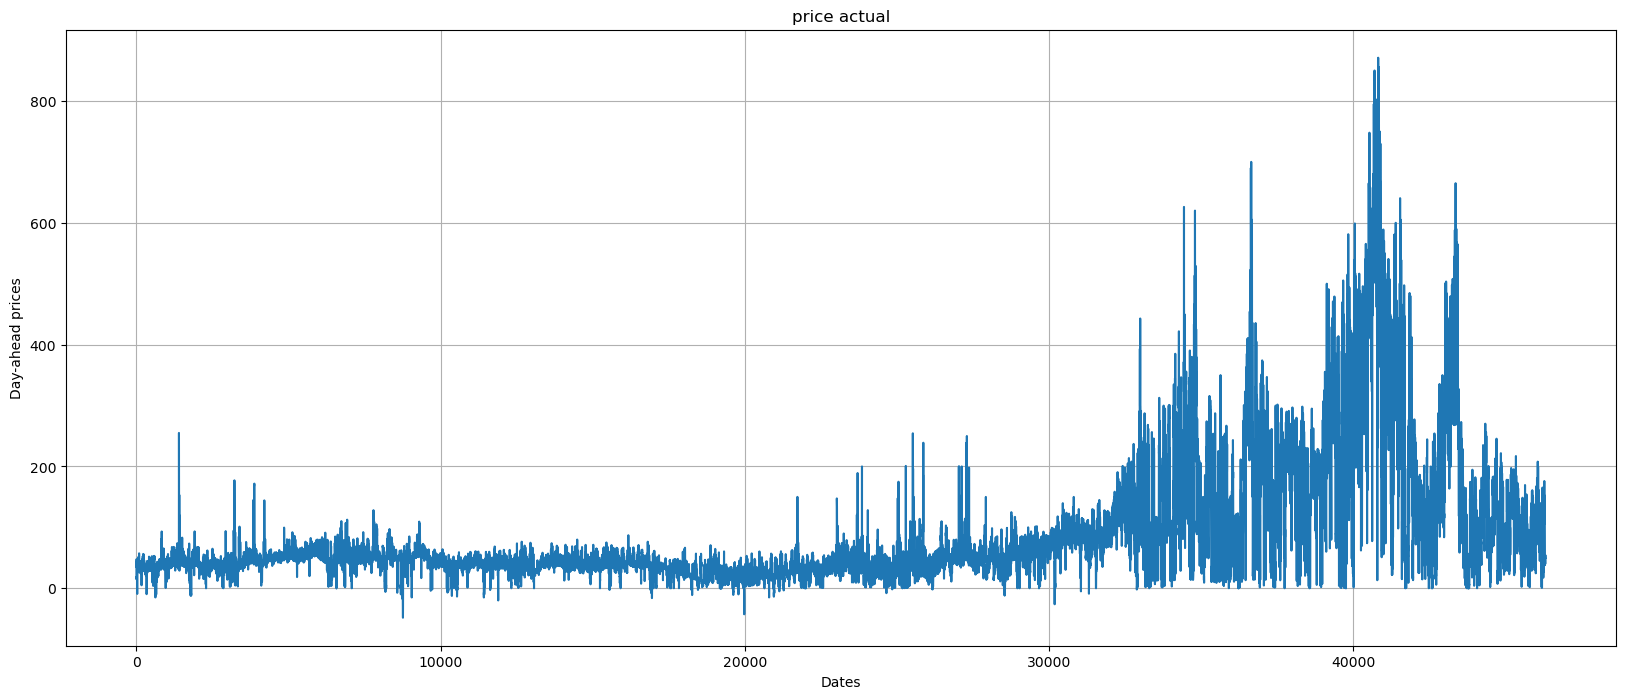

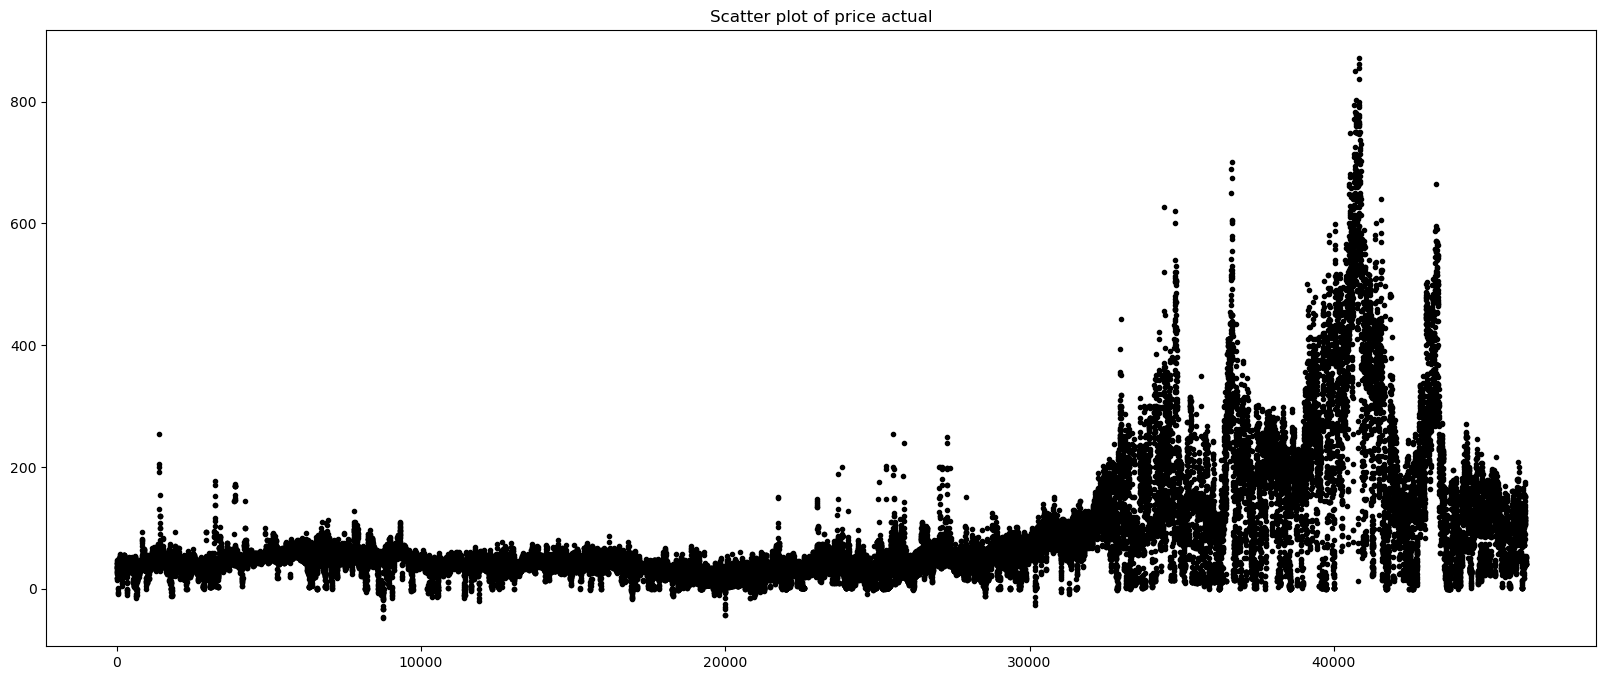

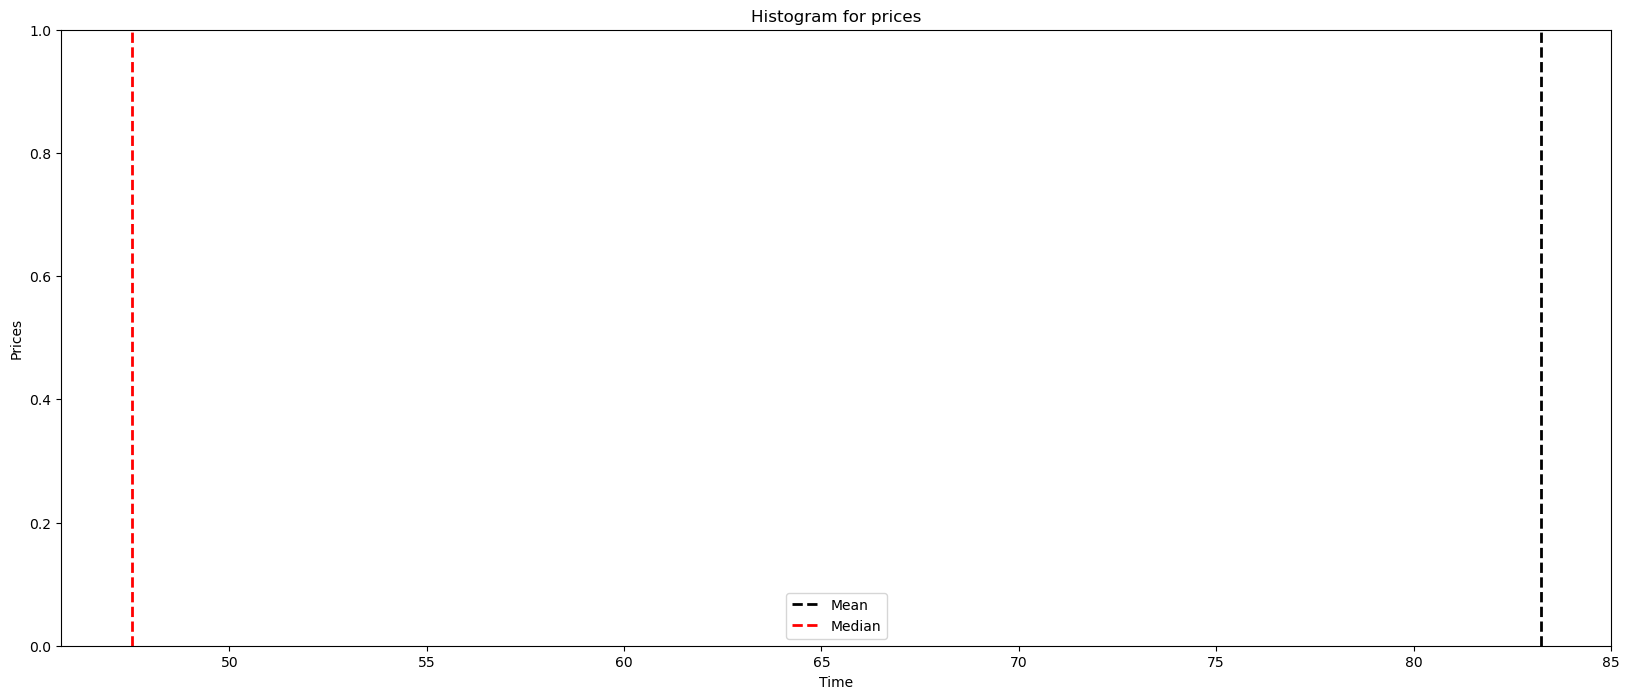

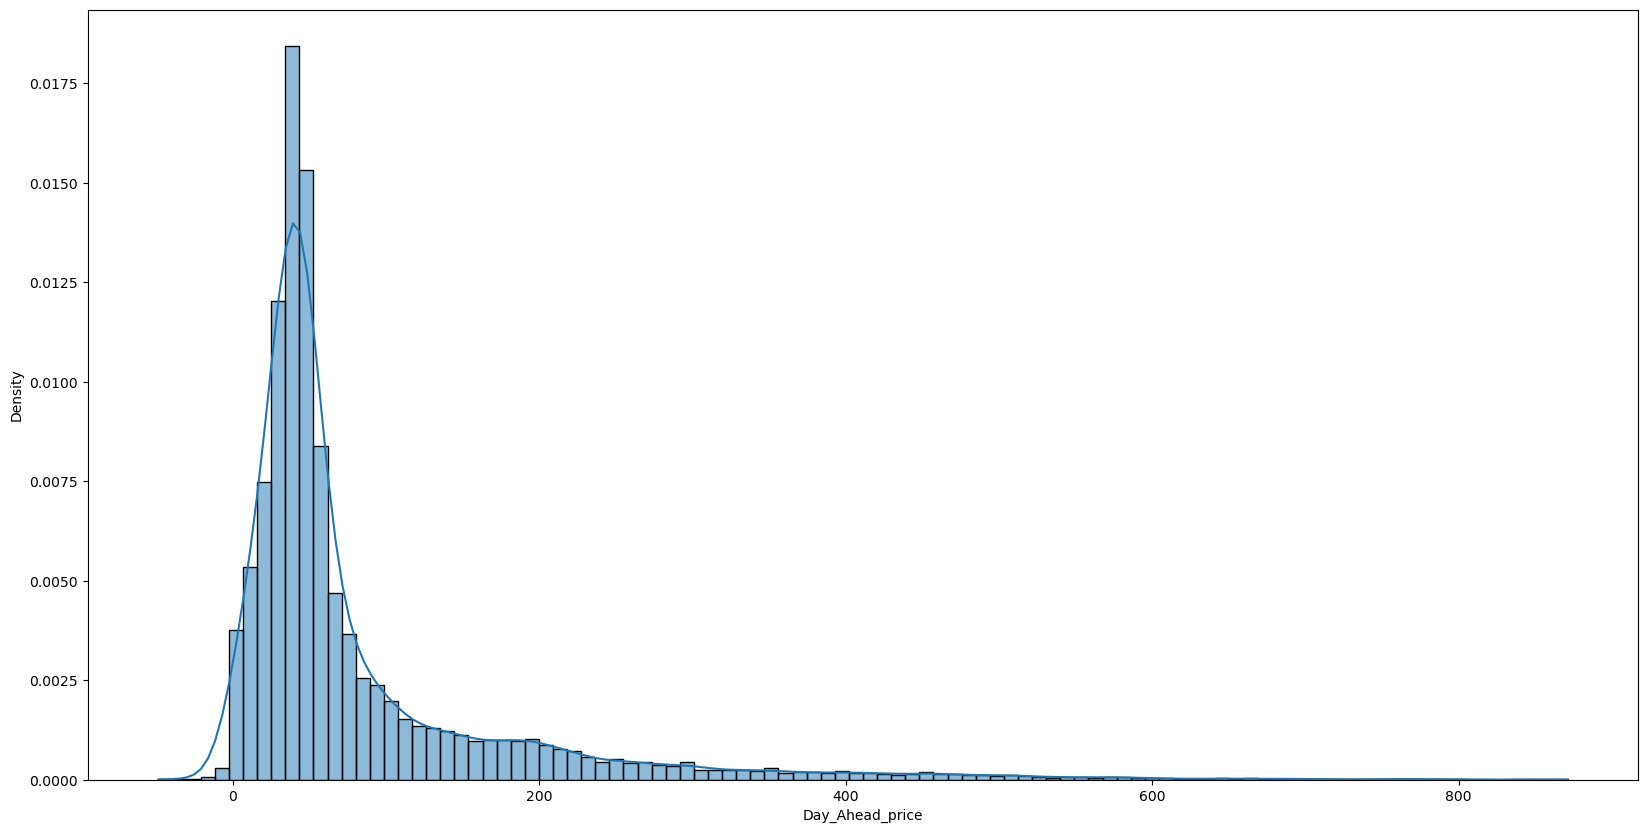

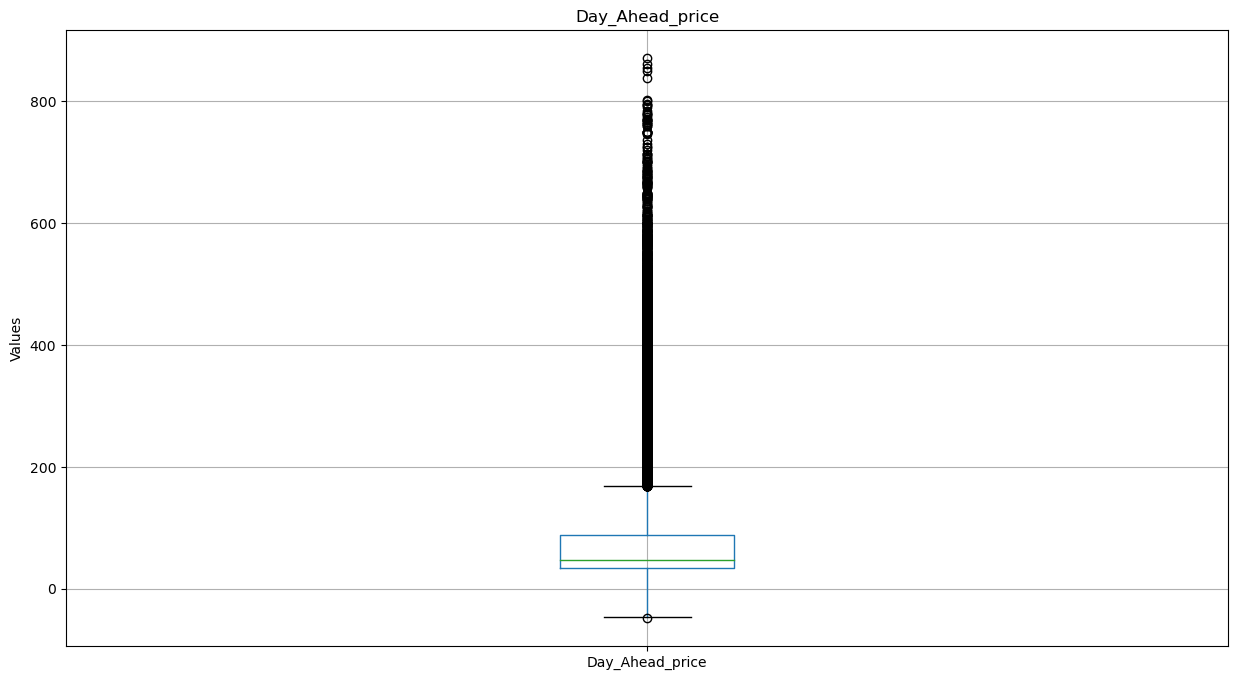

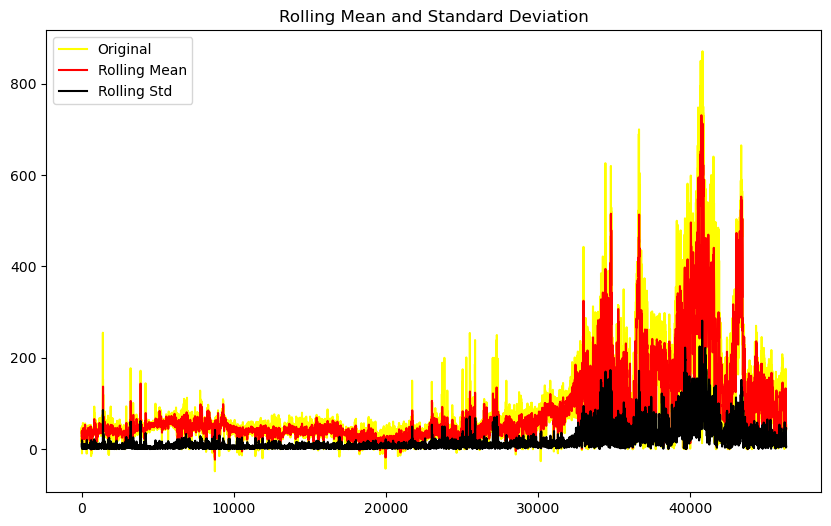

Results of dickey fuller test
Test Statistics               -8.589873e+00
p-value                        7.335294e-14
No. of lags used               5.600000e+01
Number of observations used    4.625600e+04
critical value (1%)           -3.430491e+00
critical value (5%)           -2.861602e+00
critical value (10%)          -2.566803e+00
dtype: float64


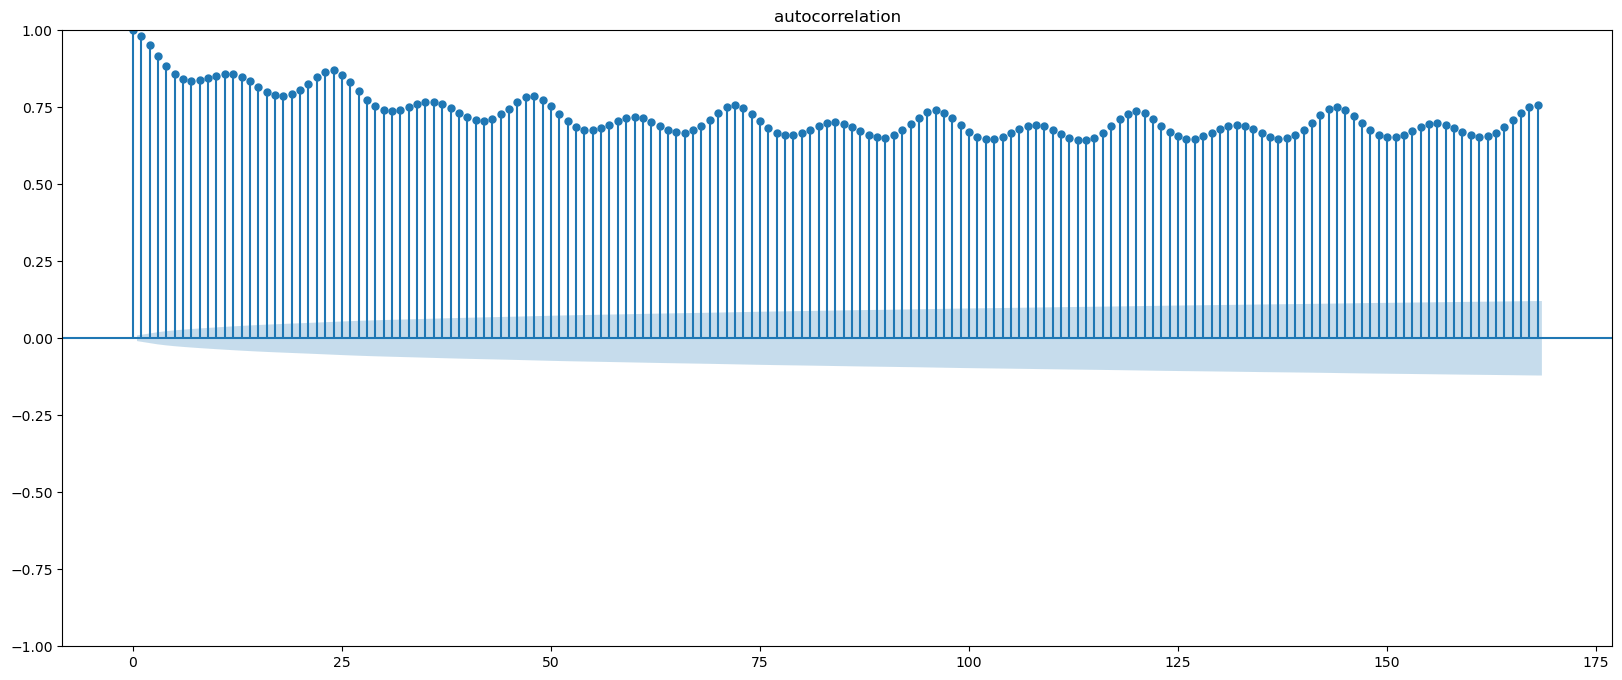

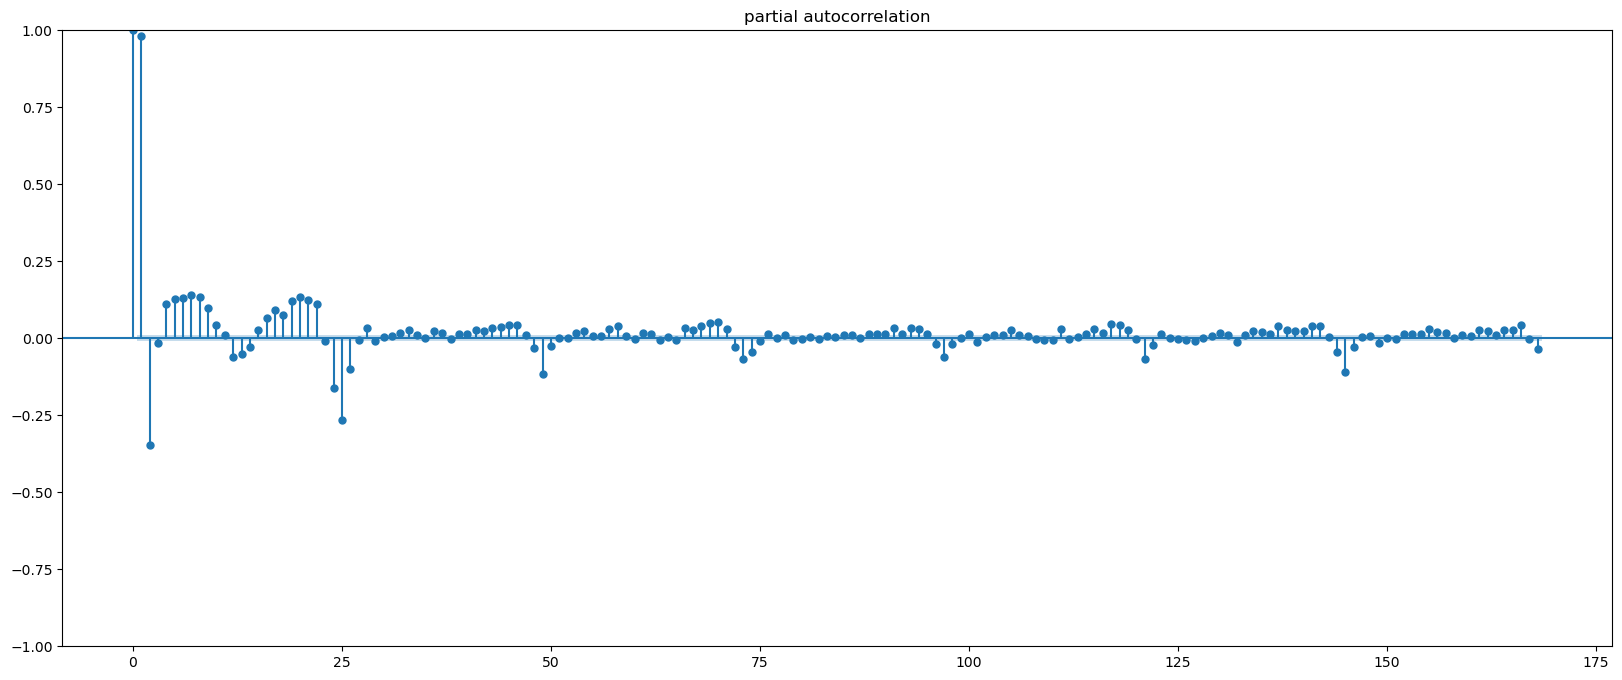

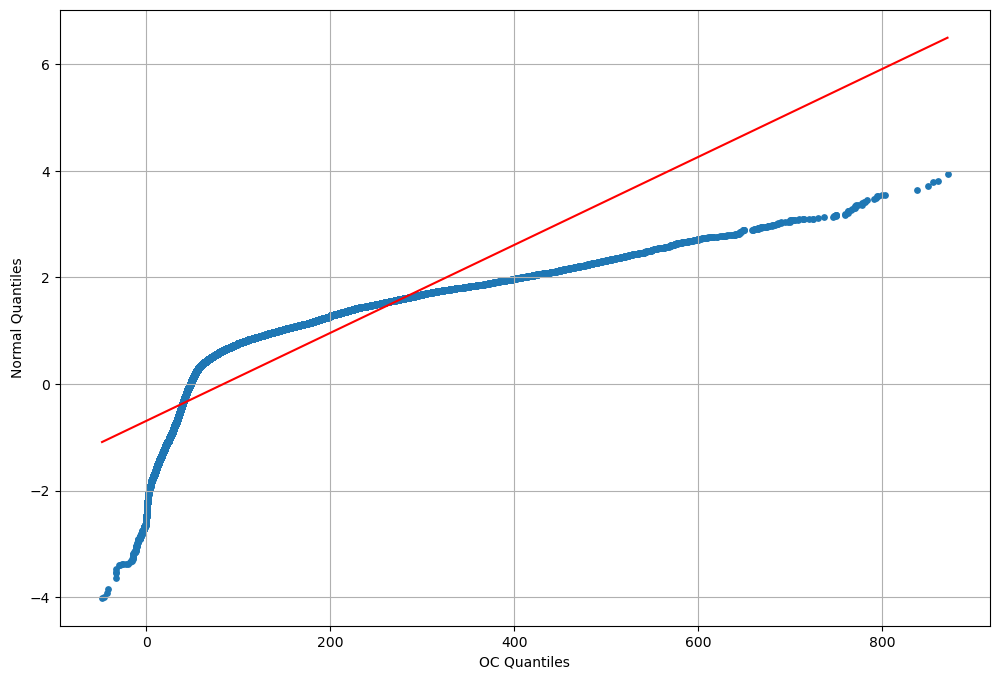

Kurtosis of Day_Ahead_price:  9.729653006928833
Skewness of Day_Ahead_price:  2.8371536866697498
Jarque-Bera Result: Jarque_beraResult(statistic=244810.34780430672, pvalue=0.0)
KPSS Statistic: 2.535905
p-value: 0.010000
#Lags used: 120
Critical Value (10%): 0.119000
Critical Value (5%): 0.146000
Critical Value (2.5%): 0.176000
Critical Value (1%): 0.216000


In [8]:
def timing2(df, column,lag):
    plot_n_scat(df[column])
    plot_hist(df[column])
    box(df,column)
    test_stationarity(df[column])
    acf_plot(df[column],lag)
    qqplot(df[column])
    testnormal(df[column])
    kpss_test(df[column])


timing2(df,'Day_Ahead_price',168)

Based on the plots, it is clear that the price rose over the last period of the dataset. In the boxplot, this creates this increase as extreme values, way above the 75-percentile. Furthermore, this increased the mean but the media is quite smaller, as it the rise was only the year 2022. 

The test statistic is less than 0.01 which is a strong evidence that it is a non-stationary timeseries.

# Wind load

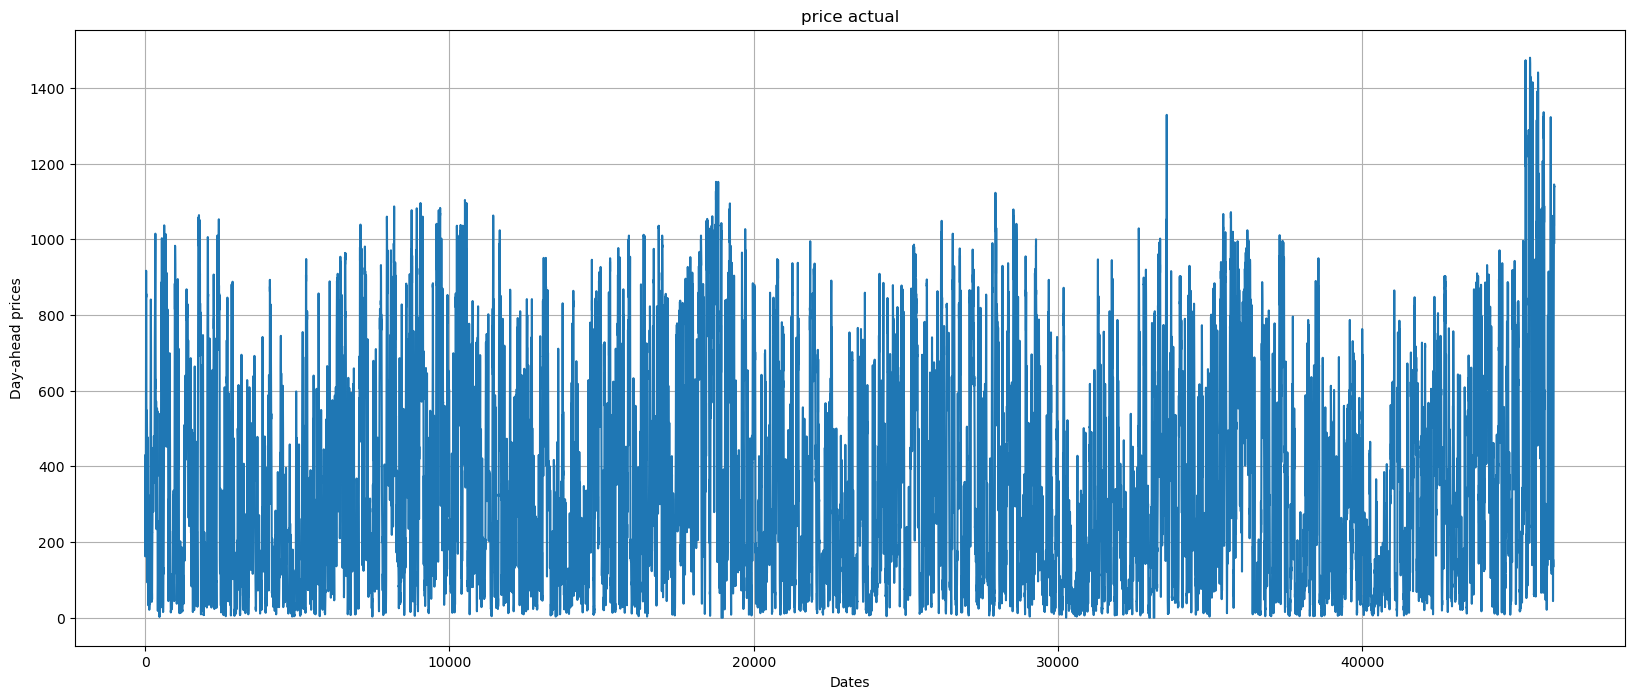

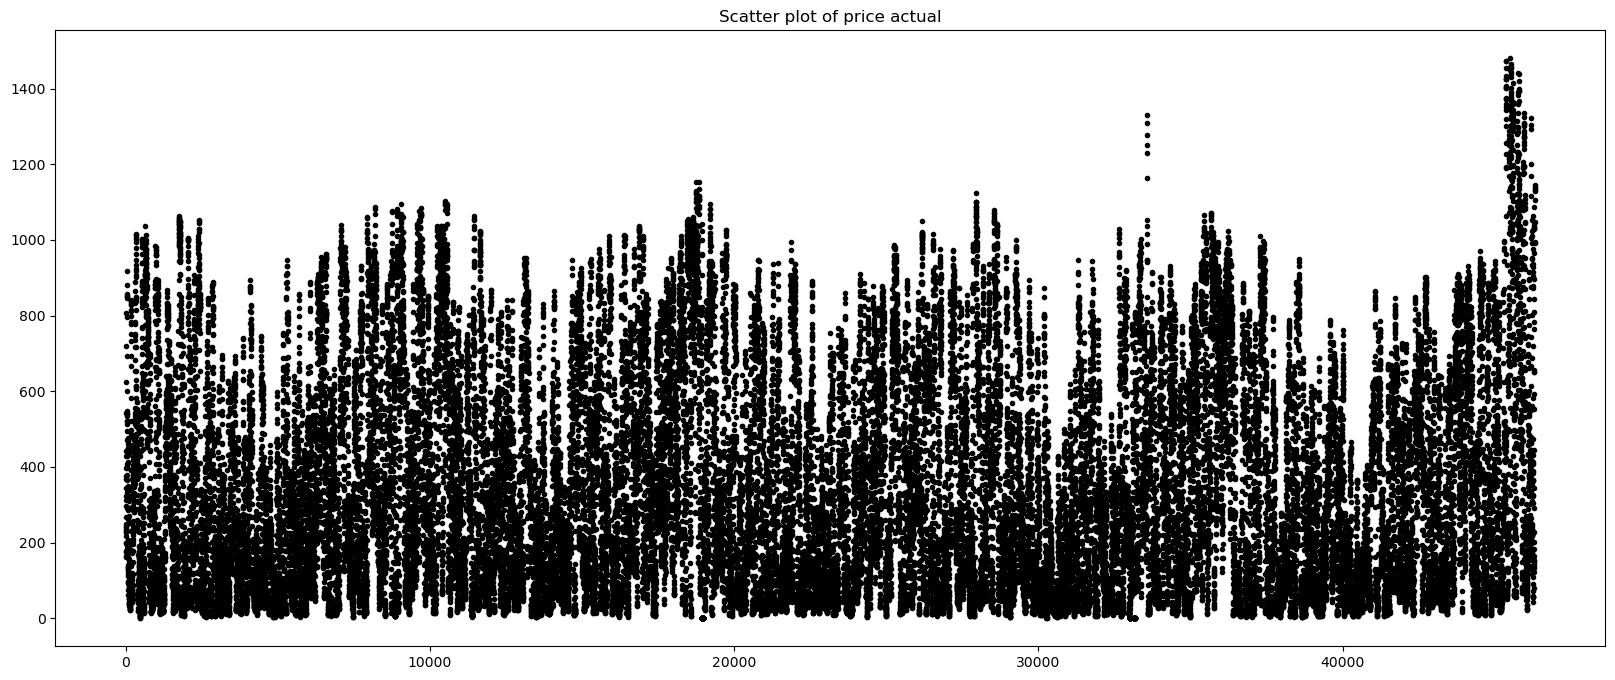

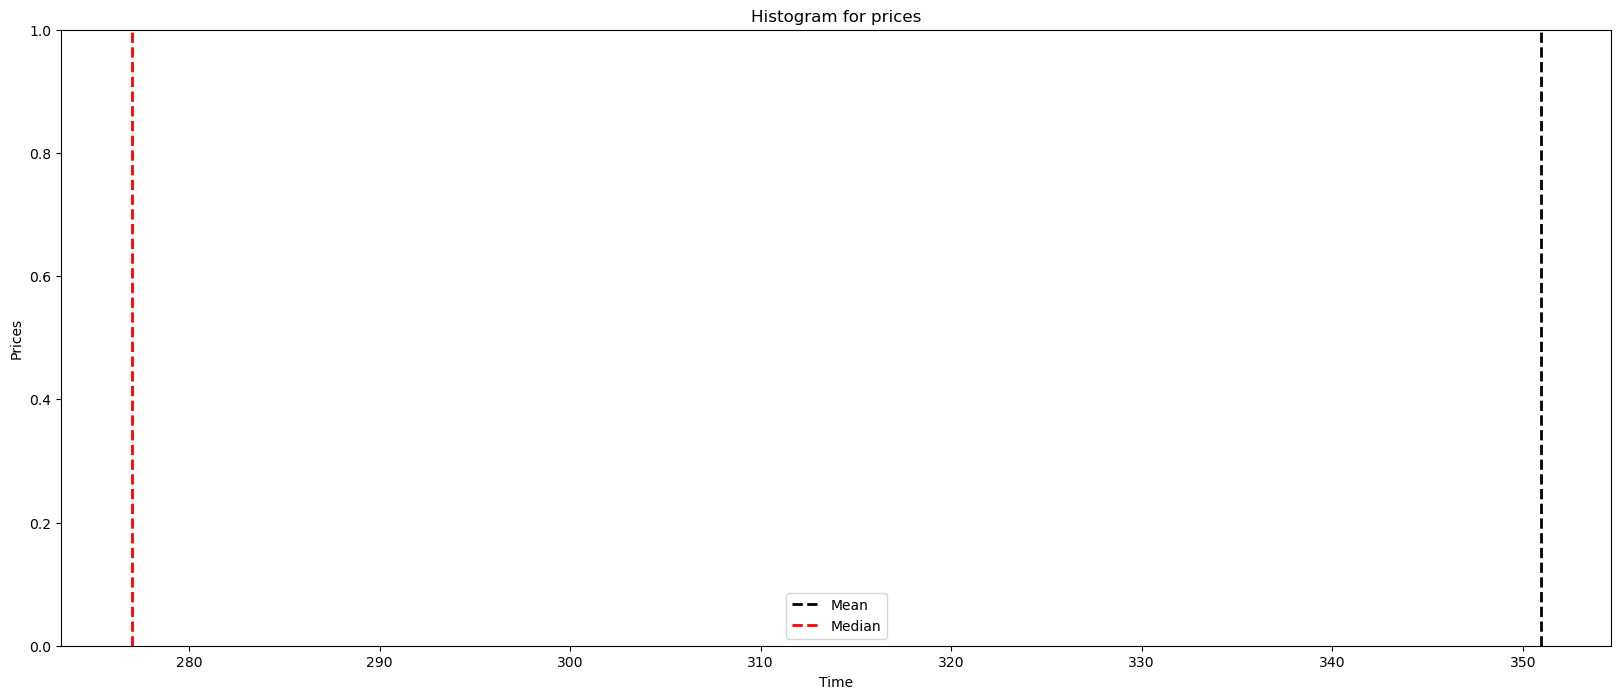

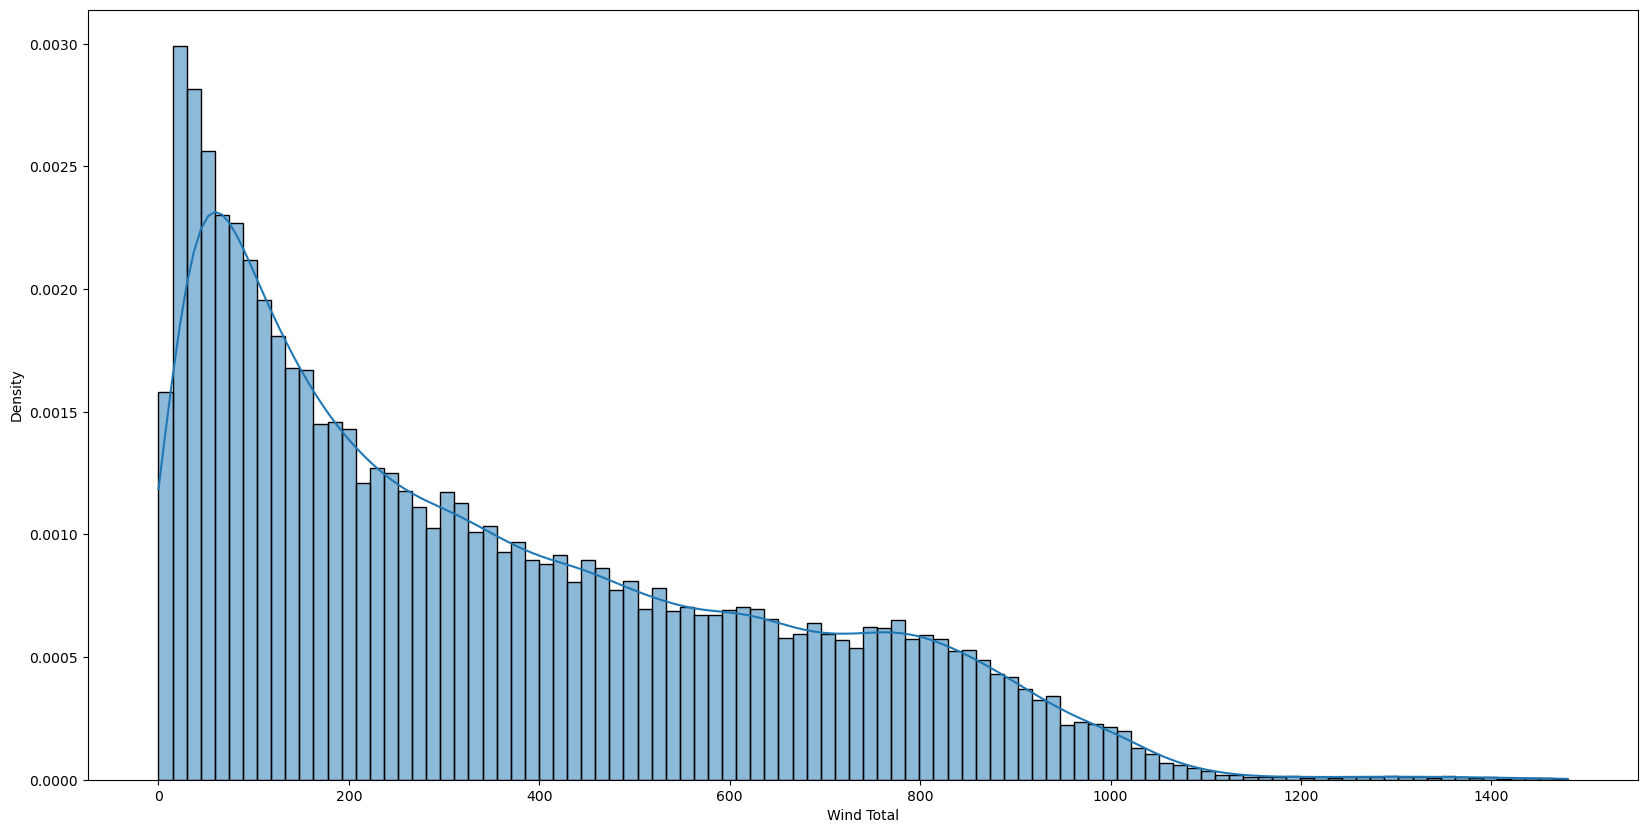

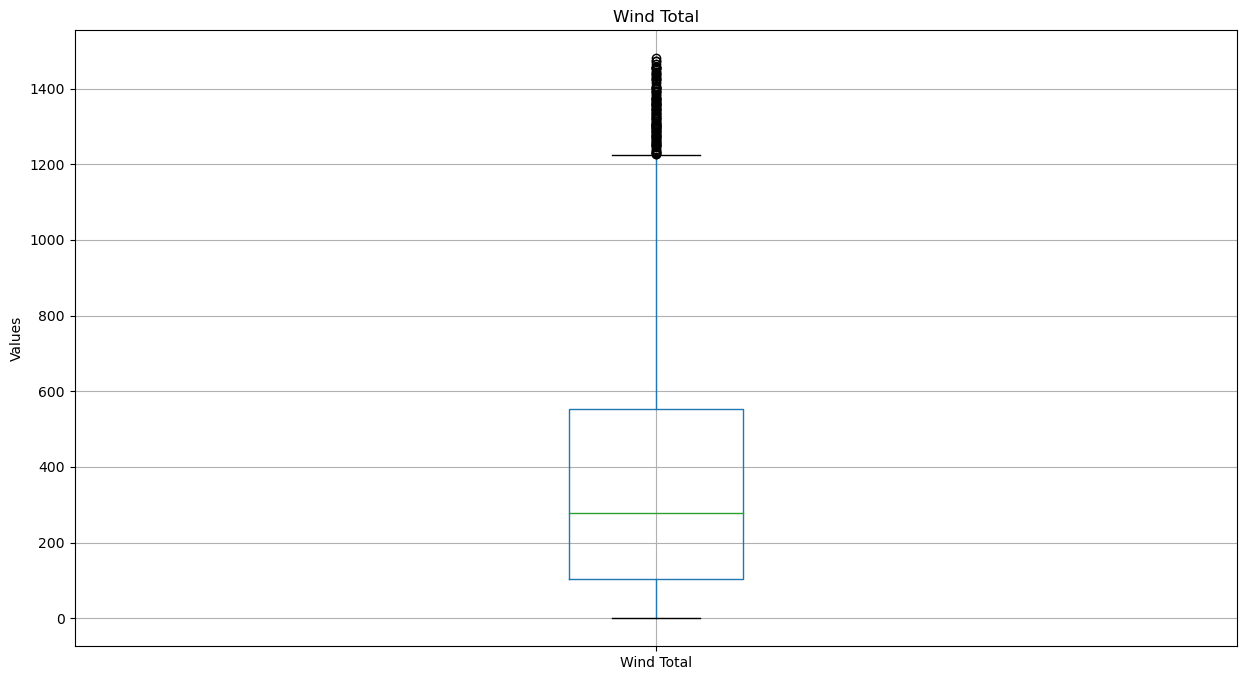

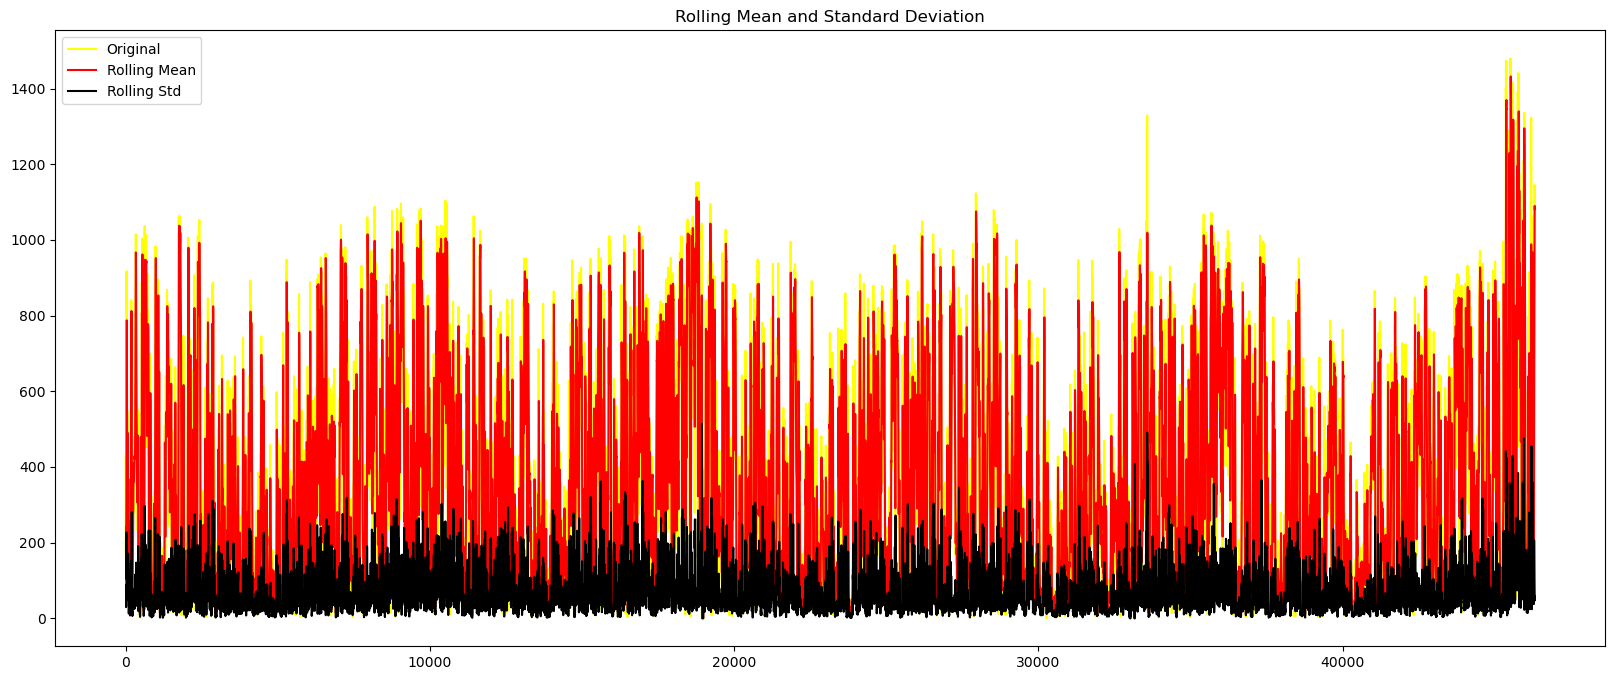

Results of dickey fuller test
Test Statistics               -1.880737e+01
p-value                        2.022573e-30
No. of lags used               5.100000e+01
Number of observations used    4.626100e+04
critical value (1%)           -3.430491e+00
critical value (5%)           -2.861602e+00
critical value (10%)          -2.566803e+00
dtype: float64


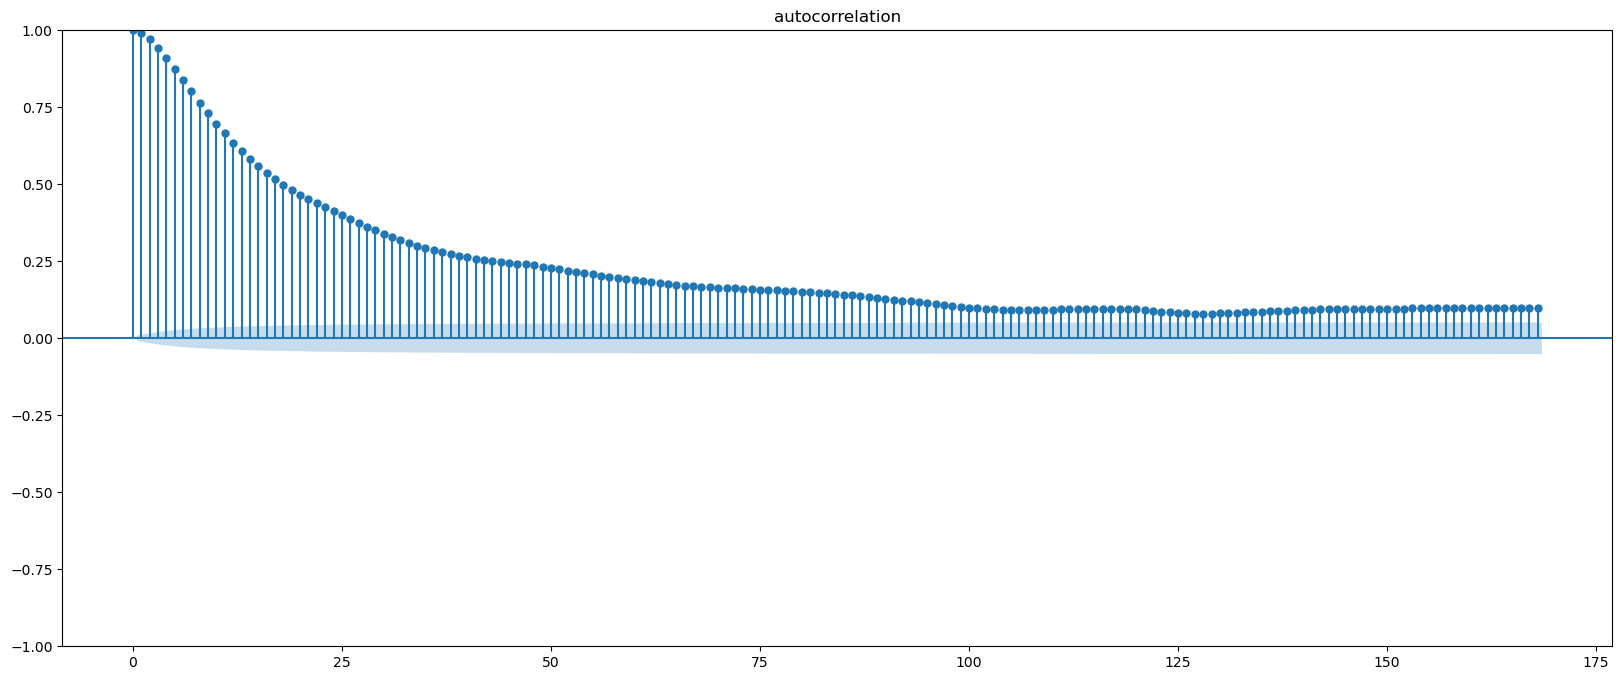

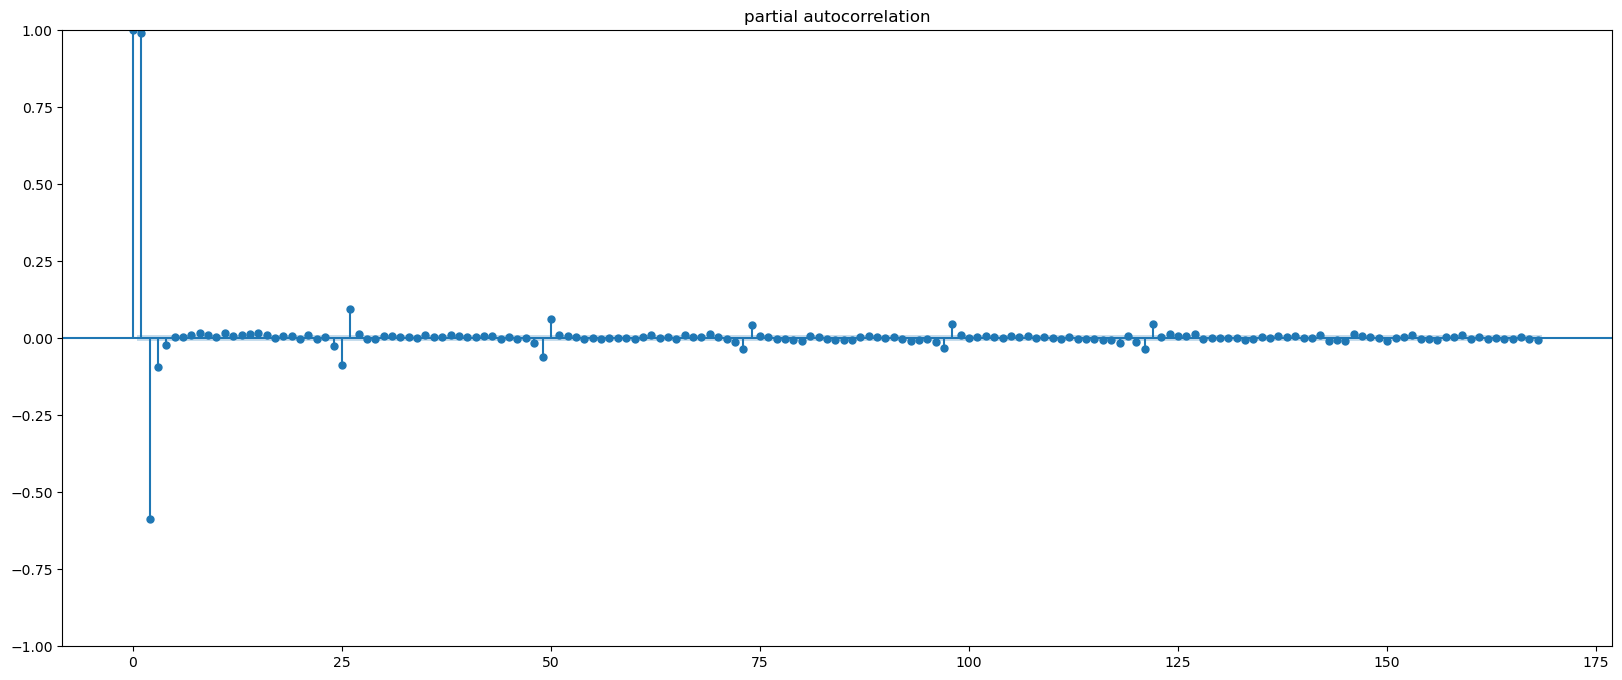

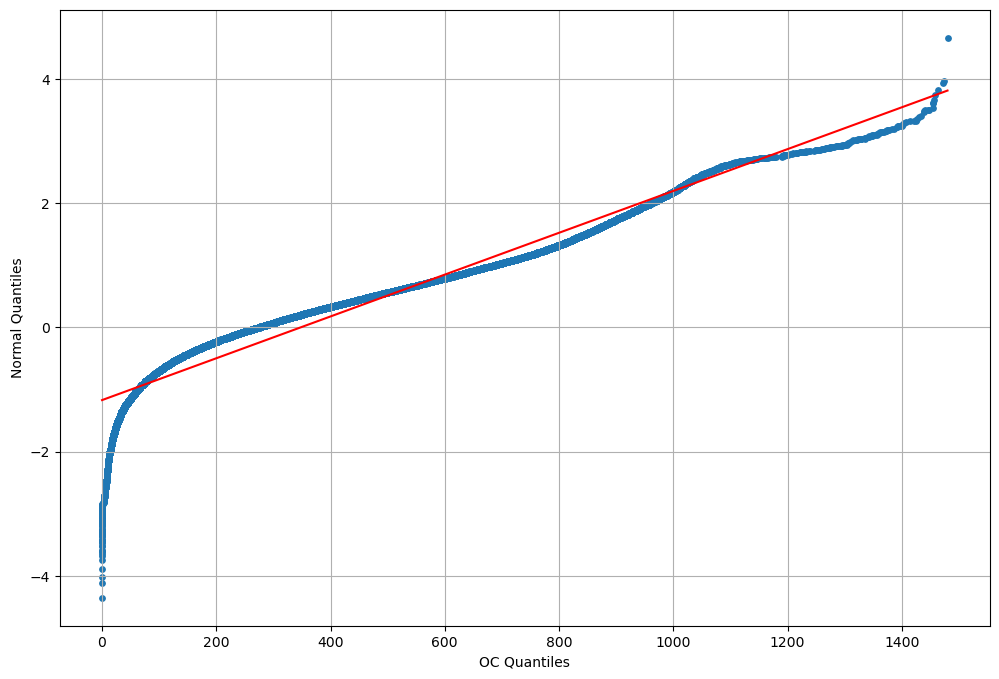

Kurtosis of Wind Total:  -0.39450221020253906
Skewness of Wind Total:  0.743688505562893
Jarque-Bera Result: Jarque_beraResult(statistic=4569.399524440987, pvalue=0.0)
KPSS Statistic: 0.220503
p-value: 0.010000
#Lags used: 118
Critical Value (10%): 0.119000
Critical Value (5%): 0.146000
Critical Value (2.5%): 0.176000
Critical Value (1%): 0.216000


In [10]:
timing2(df,'Wind Total',168)

The test statistic is more negative than the critical values at the 1%, 5%, and 10% levels. This suggests strong evidence against the null hypothesis of non-stationarity and that the time series is stationary.
The p-value of the test is much smaller than the significance level of 0.01. Therefore, there is strong evidence against the null hypothesis, and we can reject it in favor of the alternative hypothesis that the time series is stationary.

As for the plots, the values of wind load are quite high over the period 2018-2023, and the median is quite small compared to the mean. This suggests the boxplot will contain many extreme values, hence the high mean - small median.The rolling mean-rolling std plot shows that the both these values are constant, thus the timeseries should be stationary.

# Actual Load

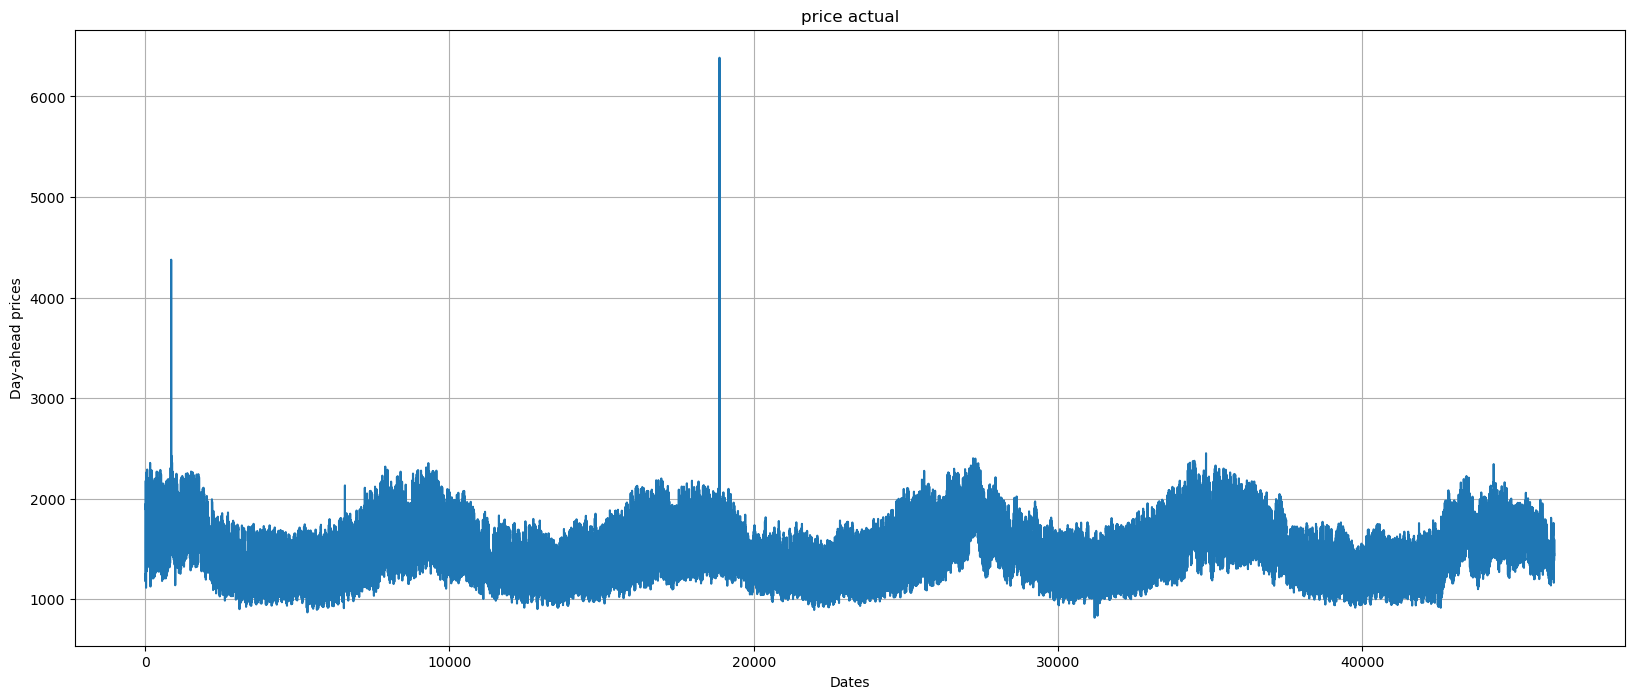

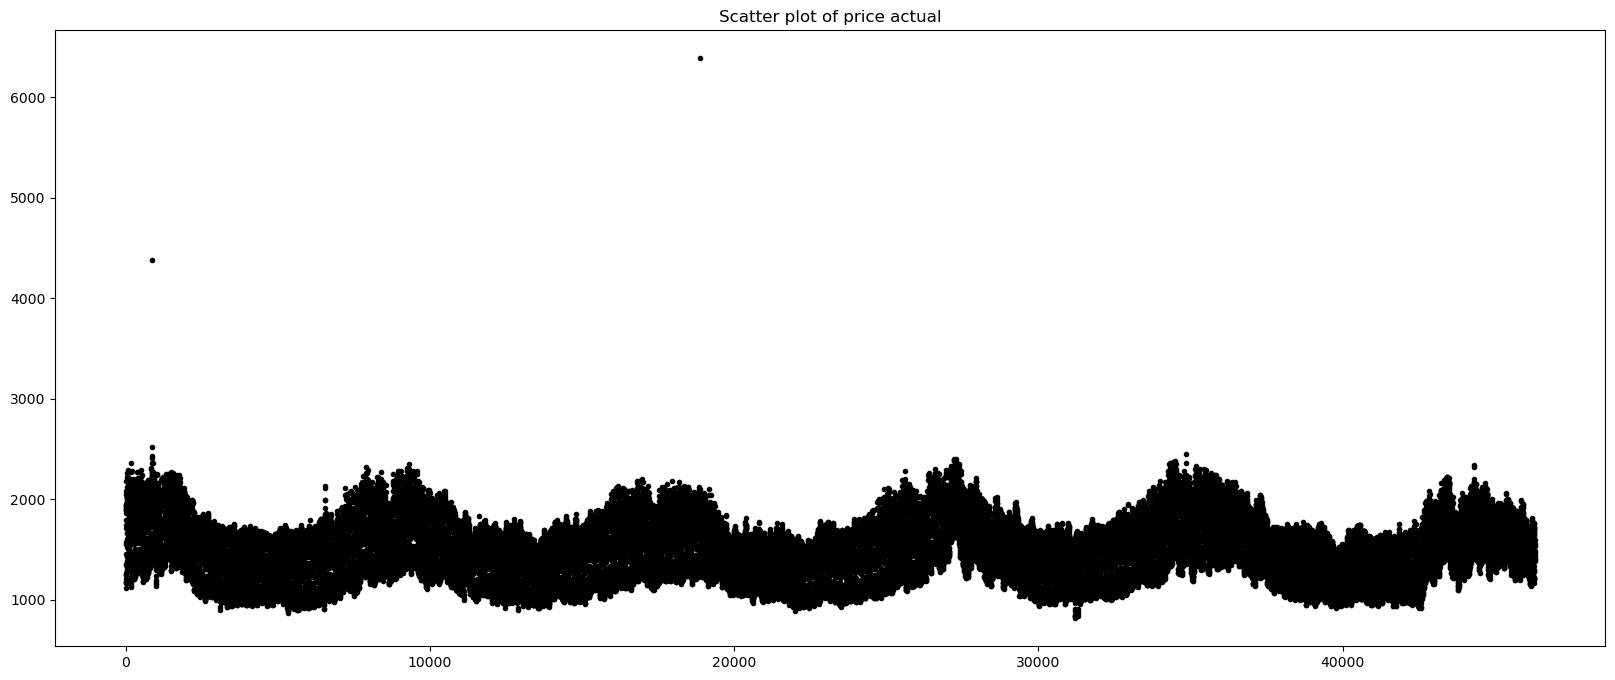

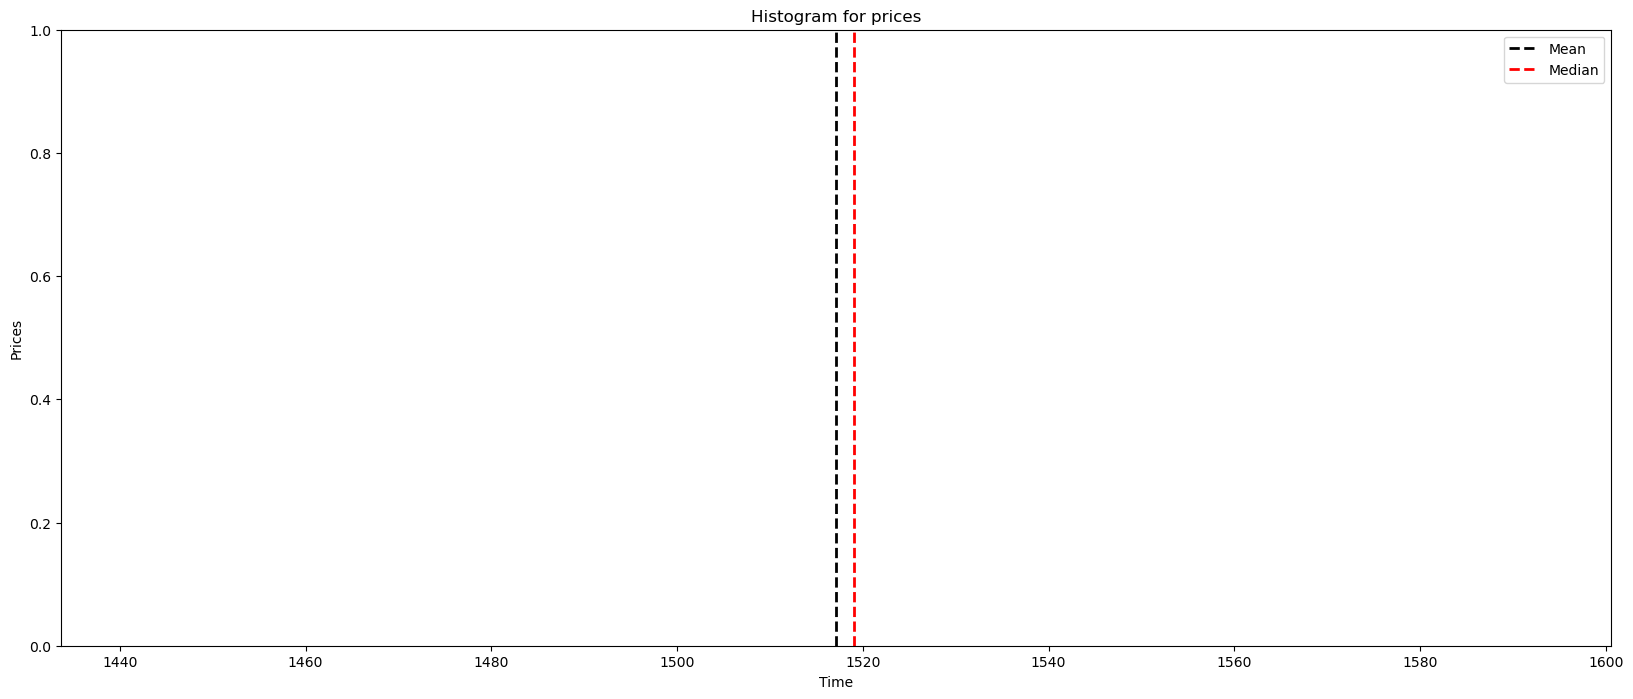

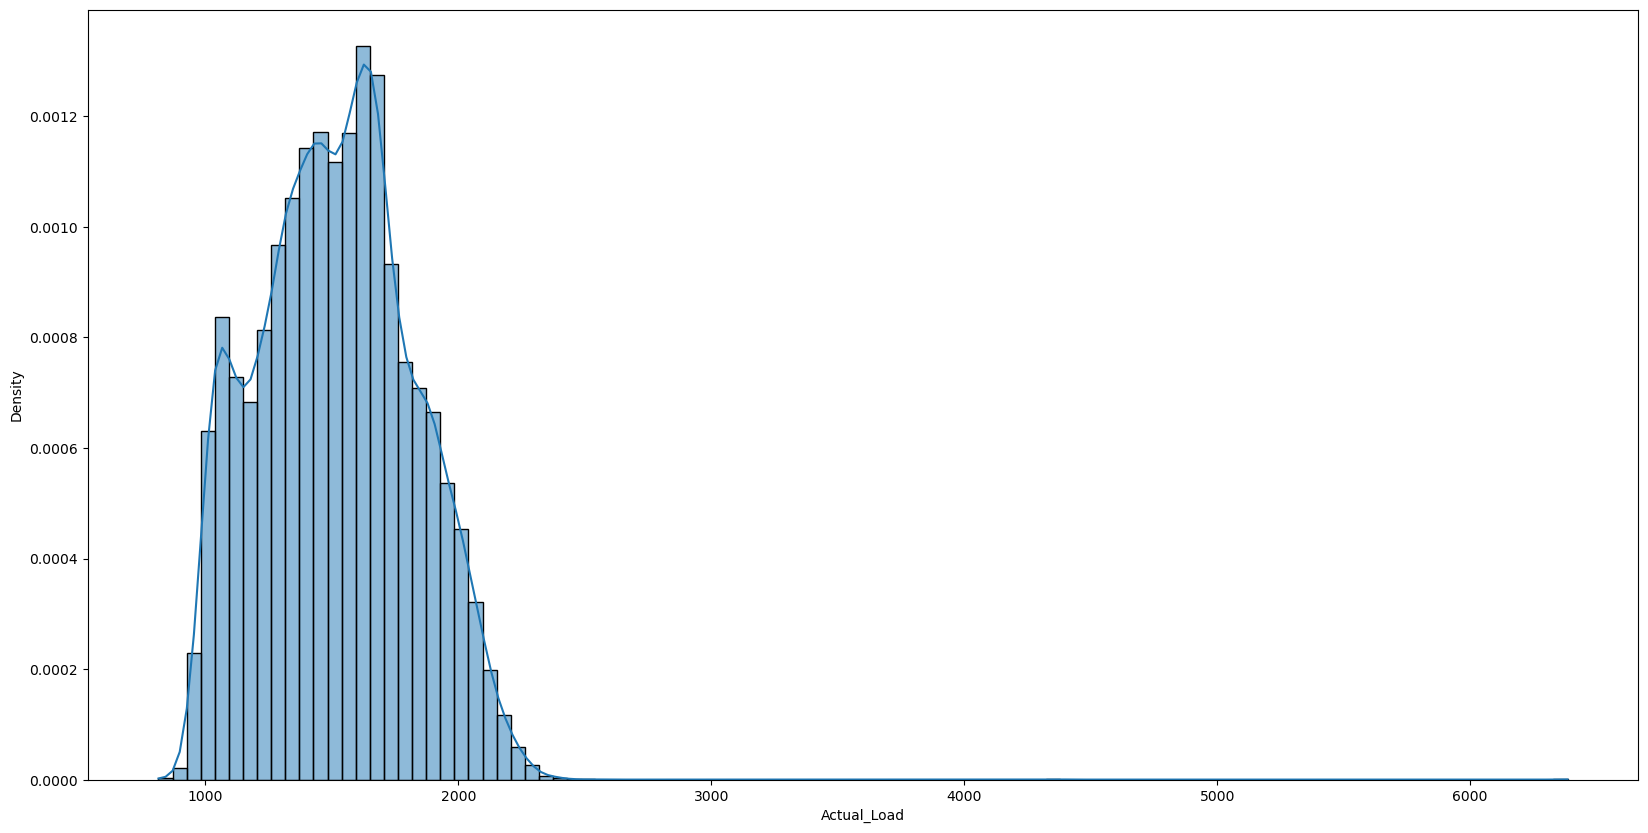

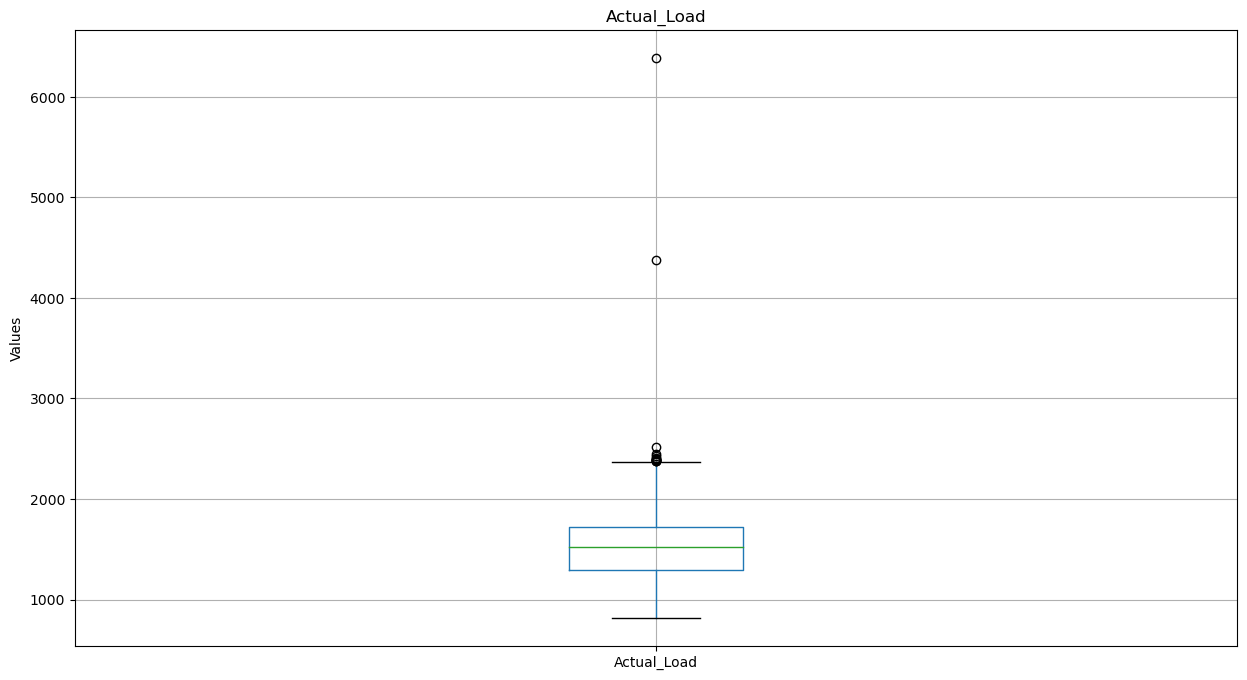

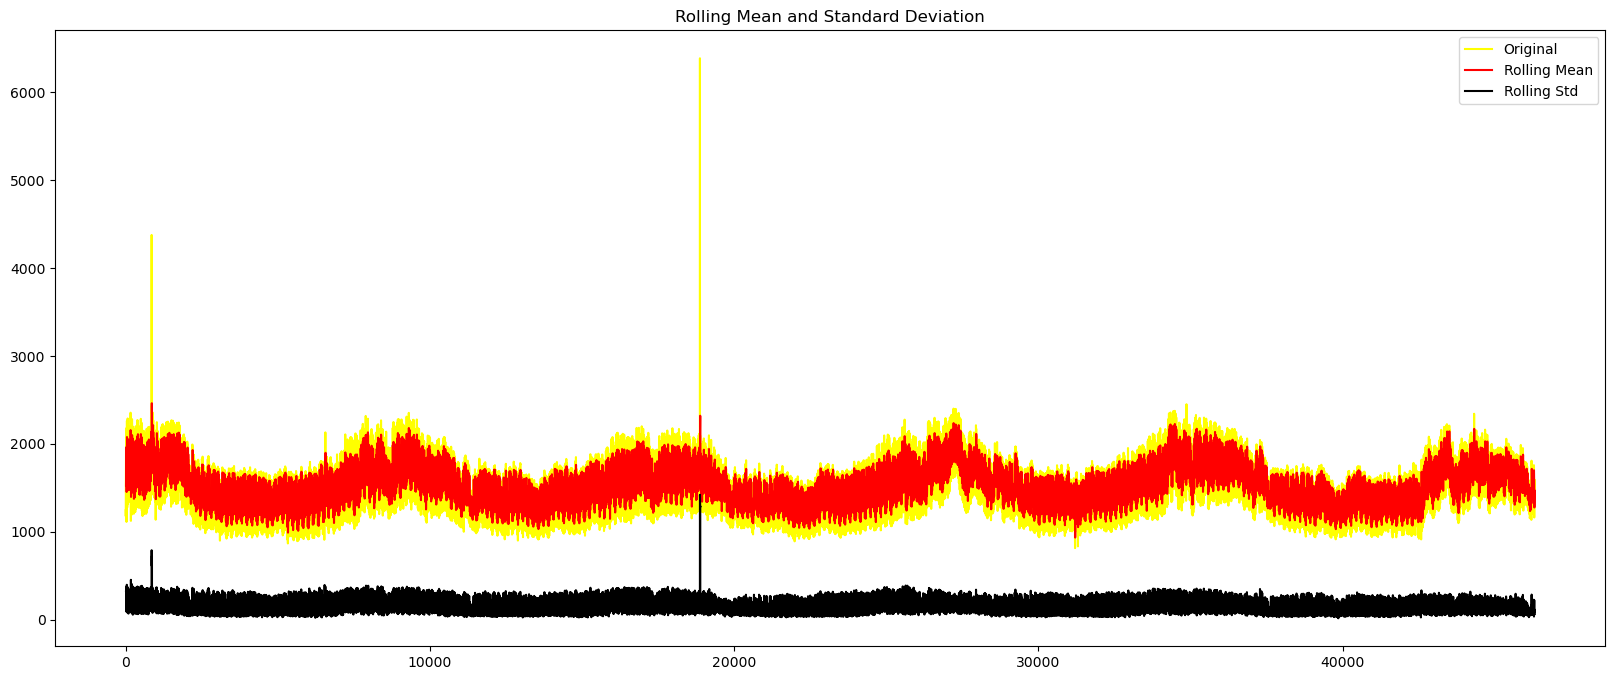

Results of dickey fuller test
Test Statistics               -1.071748e+01
p-value                        3.213679e-19
No. of lags used               5.400000e+01
Number of observations used    4.625800e+04
critical value (1%)           -3.430491e+00
critical value (5%)           -2.861602e+00
critical value (10%)          -2.566803e+00
dtype: float64


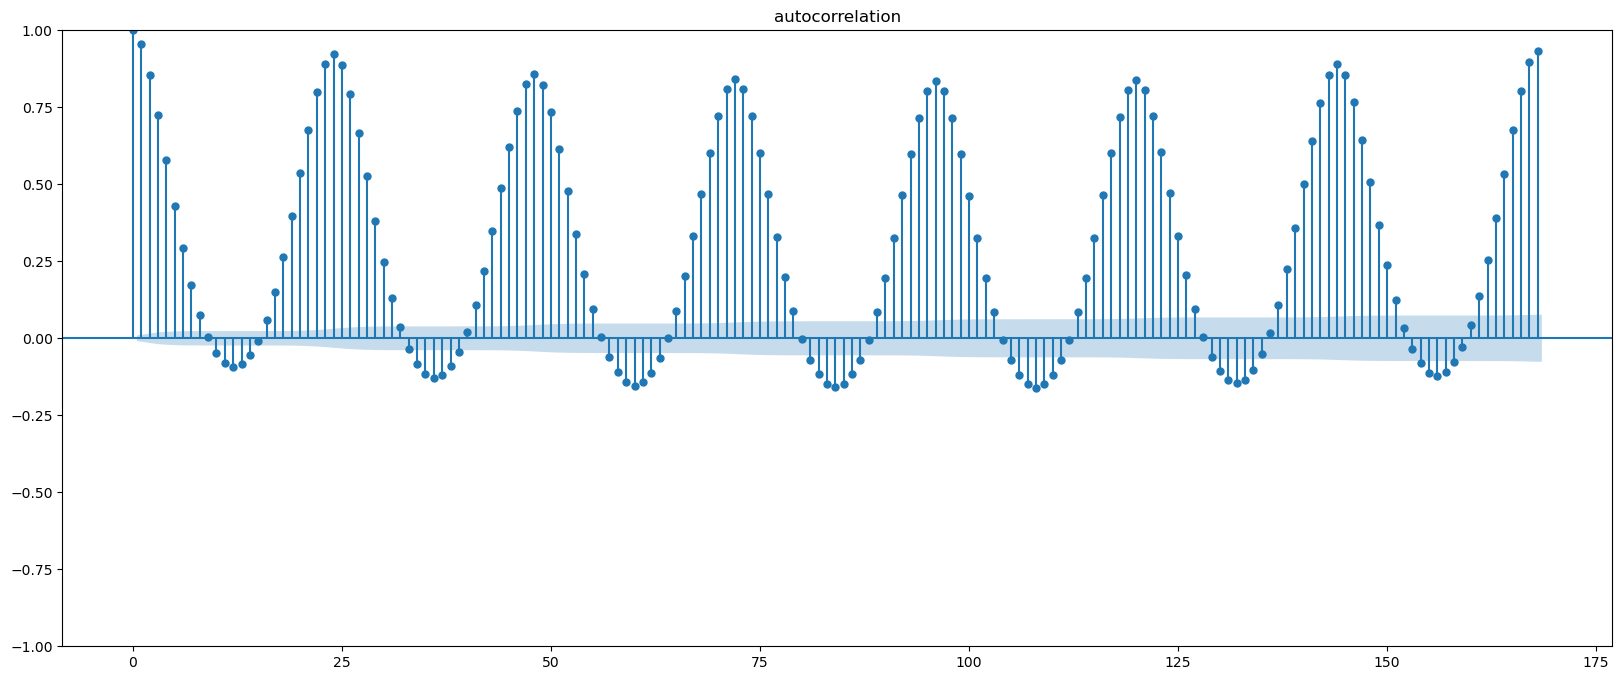

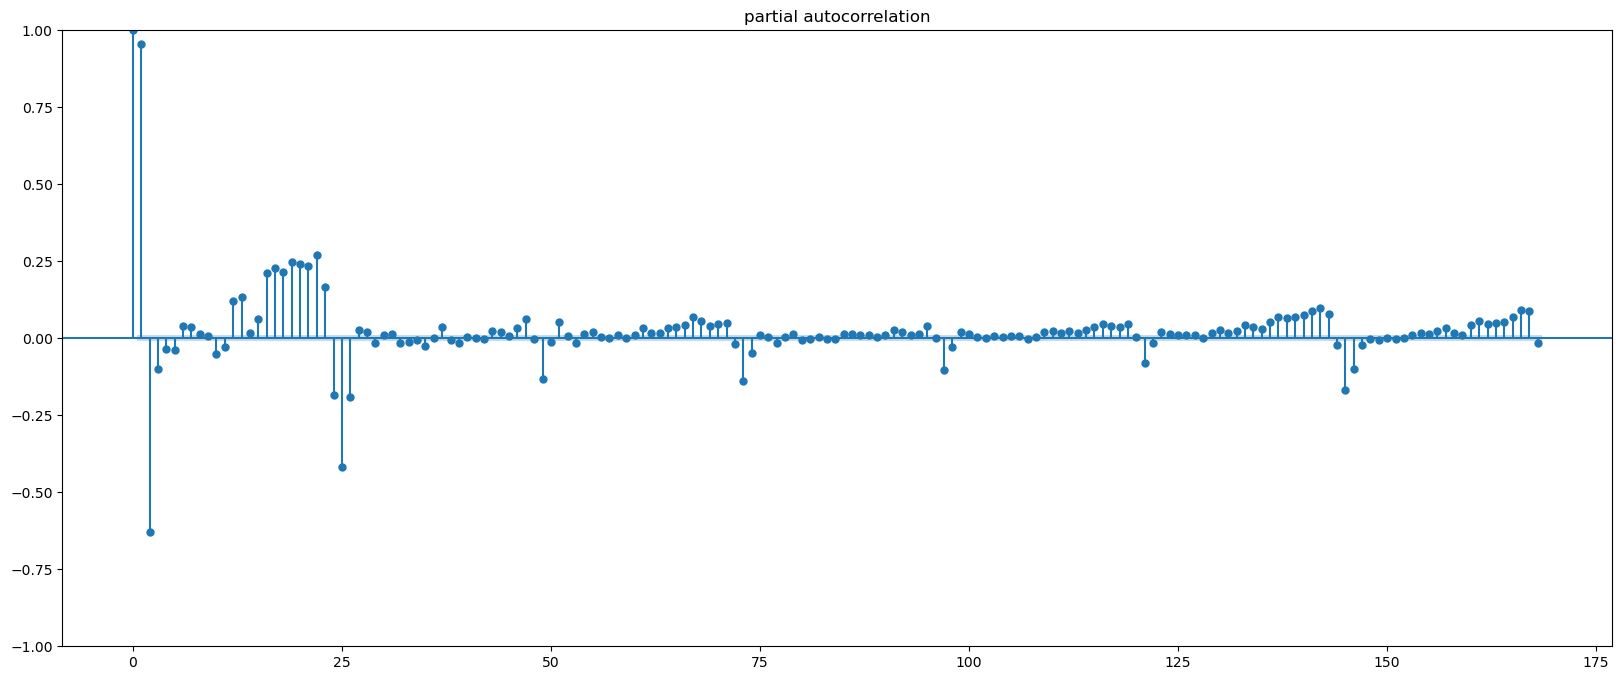

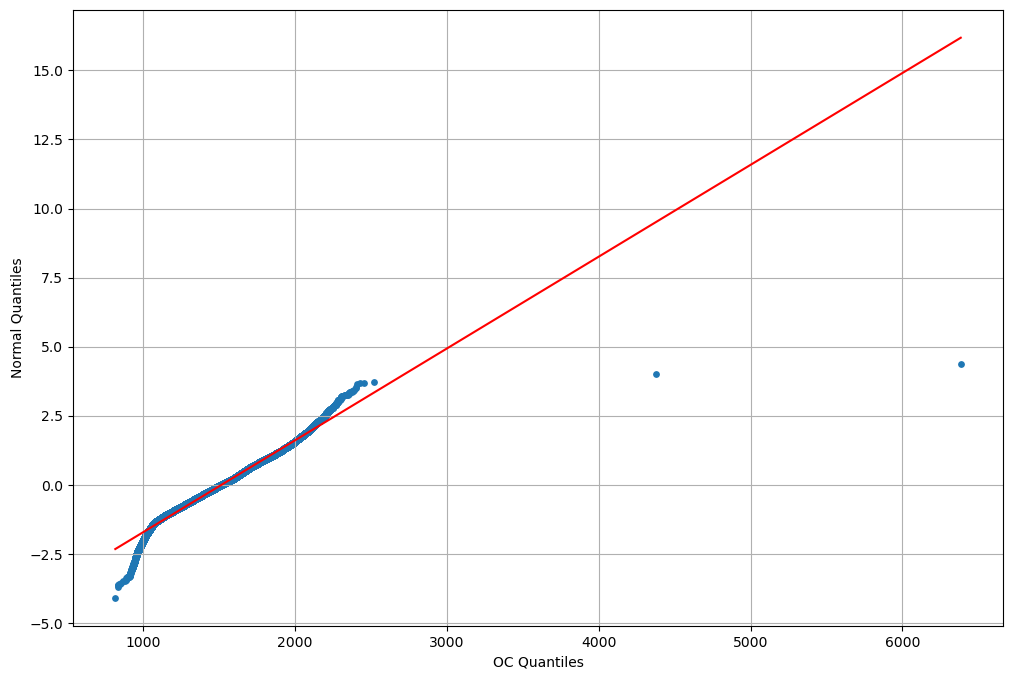

Kurtosis of Actual_Load:  0.9807471043325569
Skewness of Actual_Load:  0.22190890384163423
Jarque-Bera Result: Jarque_beraResult(statistic=2236.2215243658343, pvalue=0.0)
KPSS Statistic: 0.631480
p-value: 0.010000
#Lags used: 80
Critical Value (10%): 0.119000
Critical Value (5%): 0.146000
Critical Value (2.5%): 0.176000
Critical Value (1%): 0.216000


In [14]:
timing2(df,'Actual_Load',168)

# Emissions

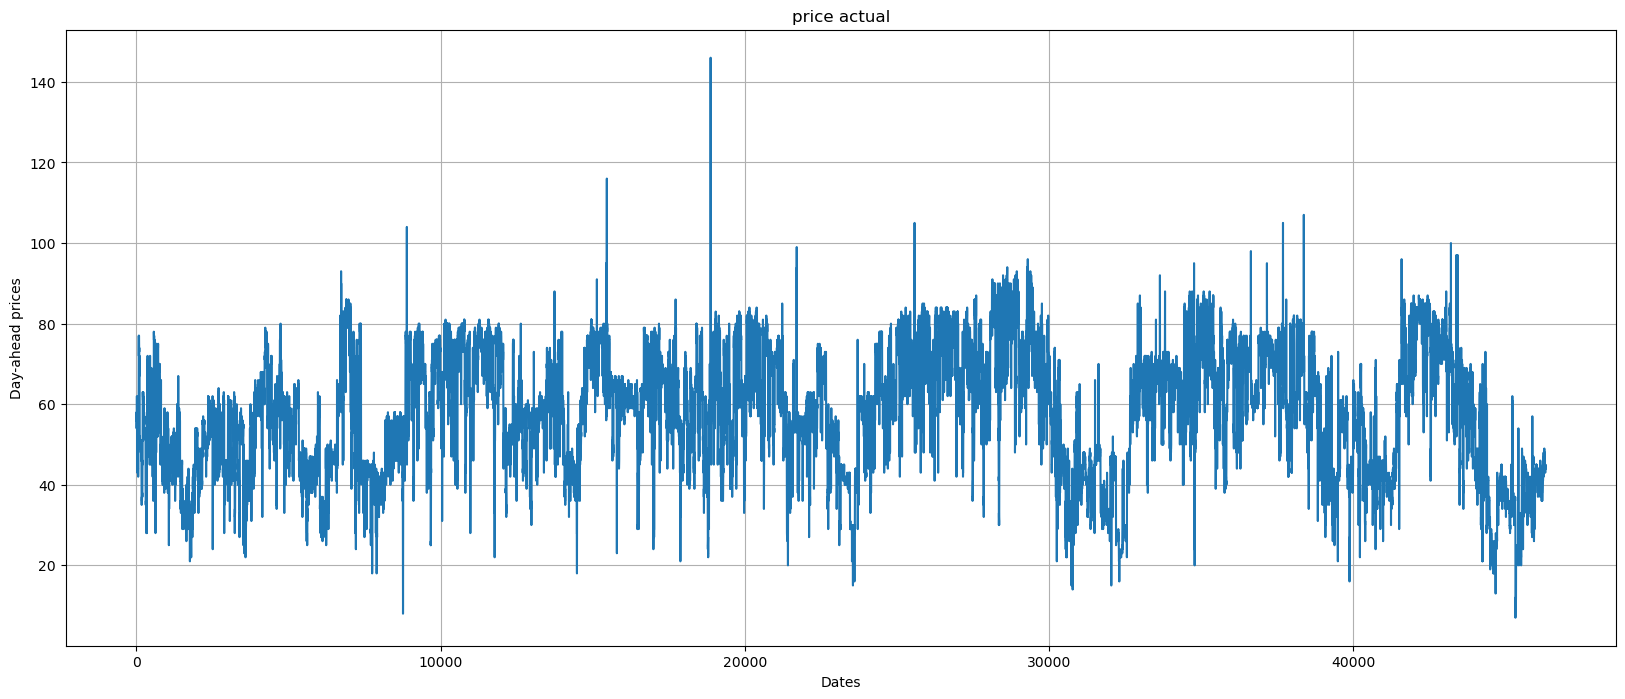

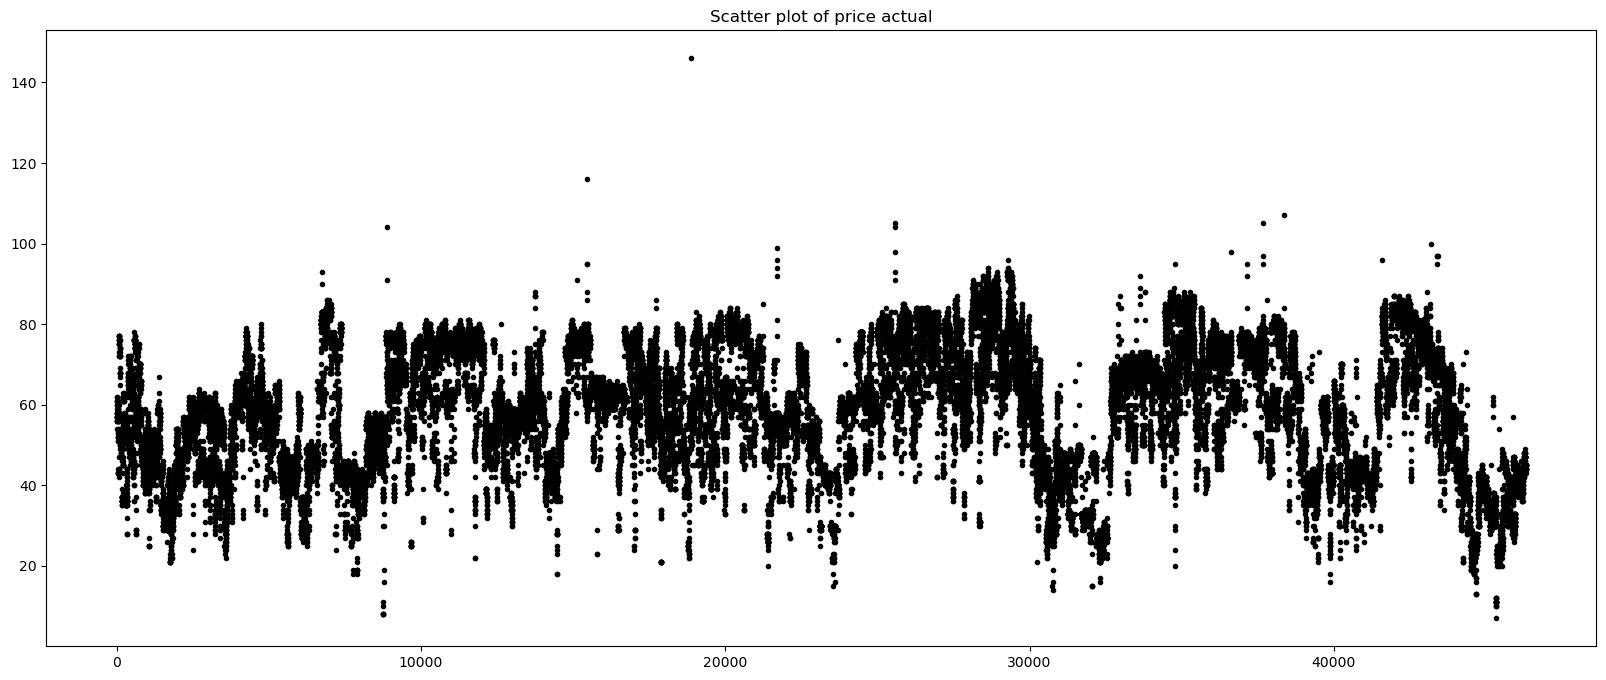

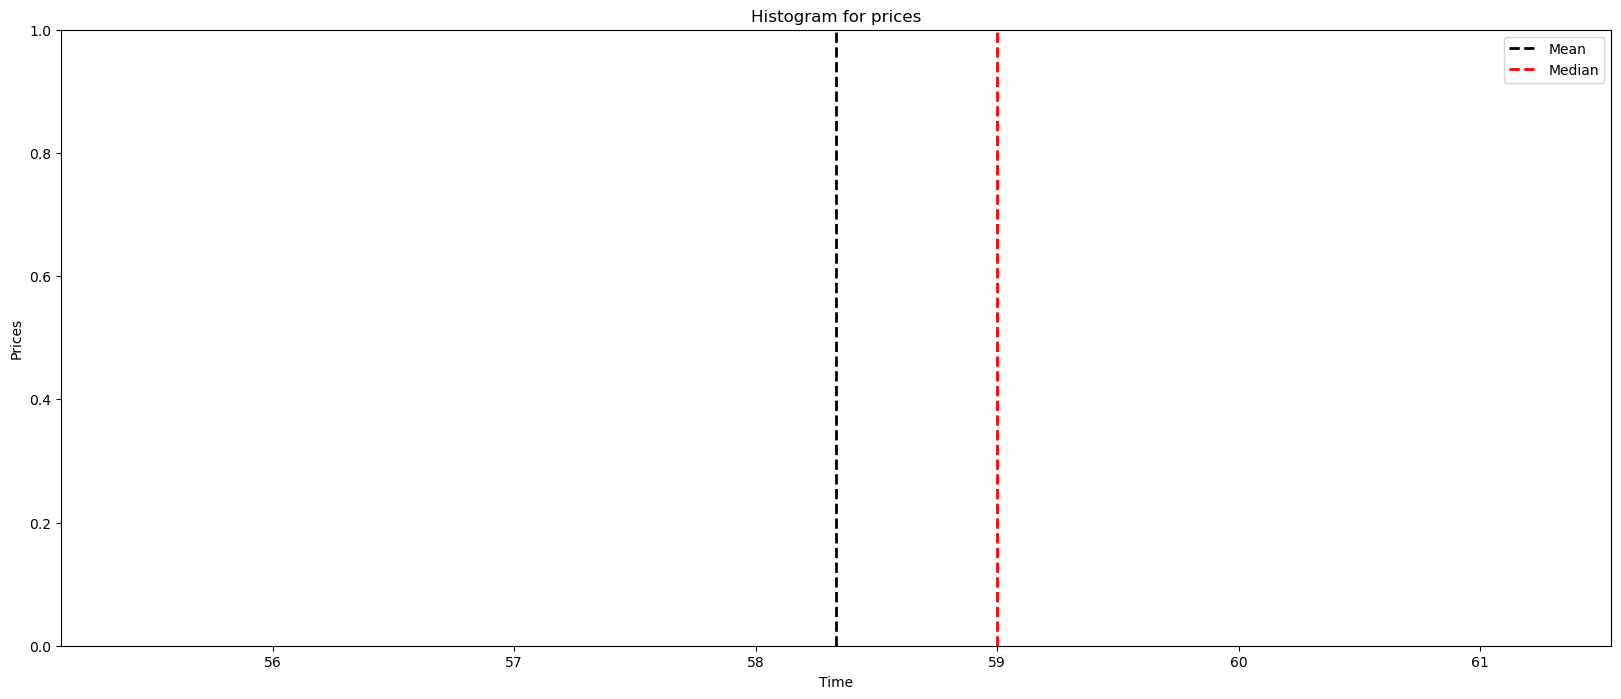

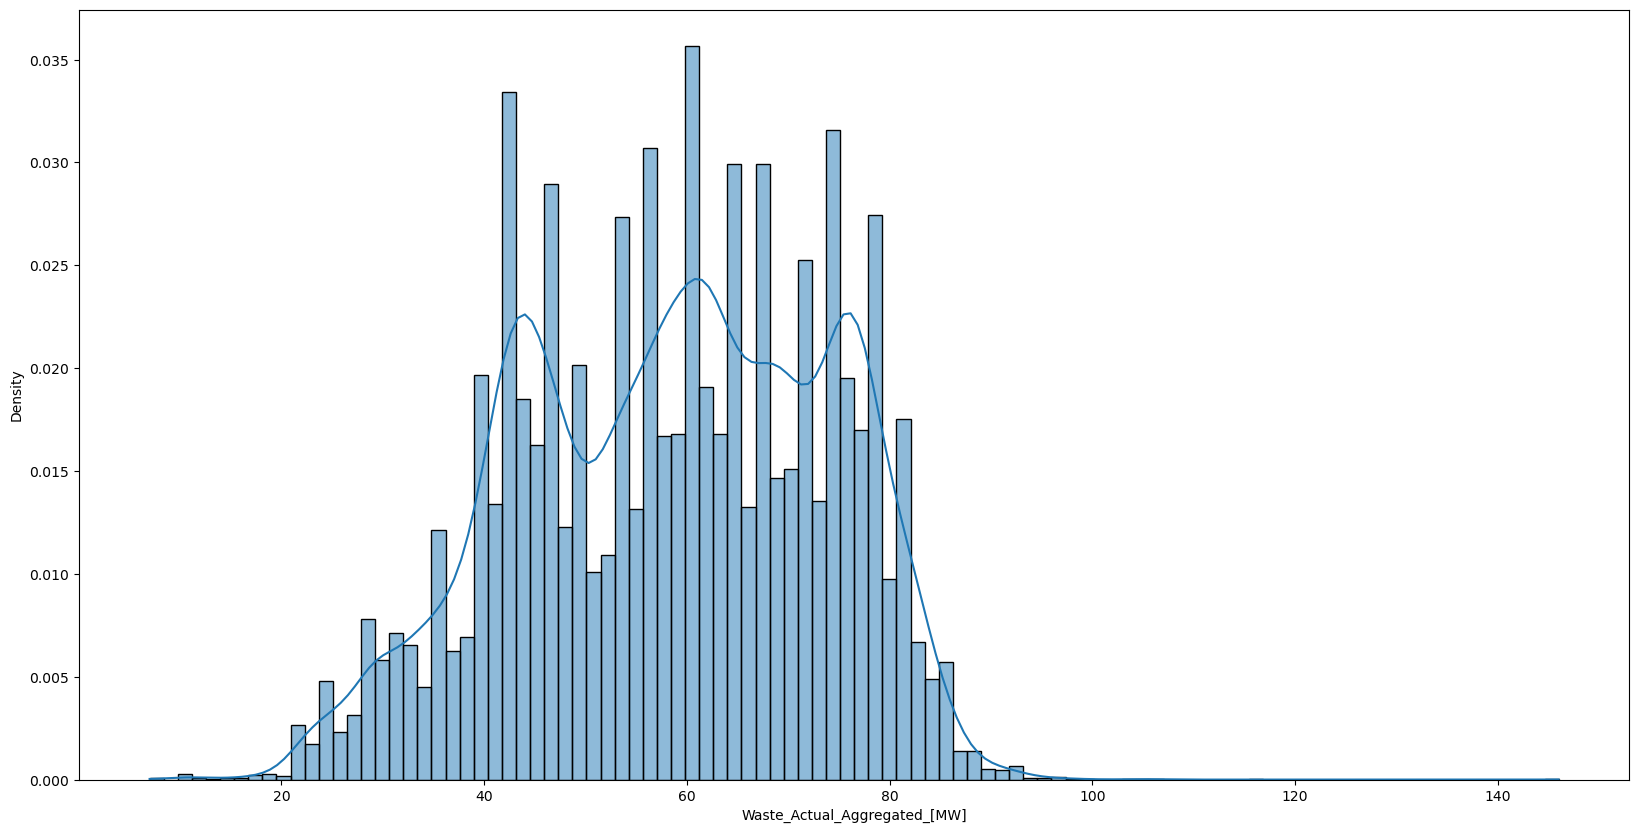

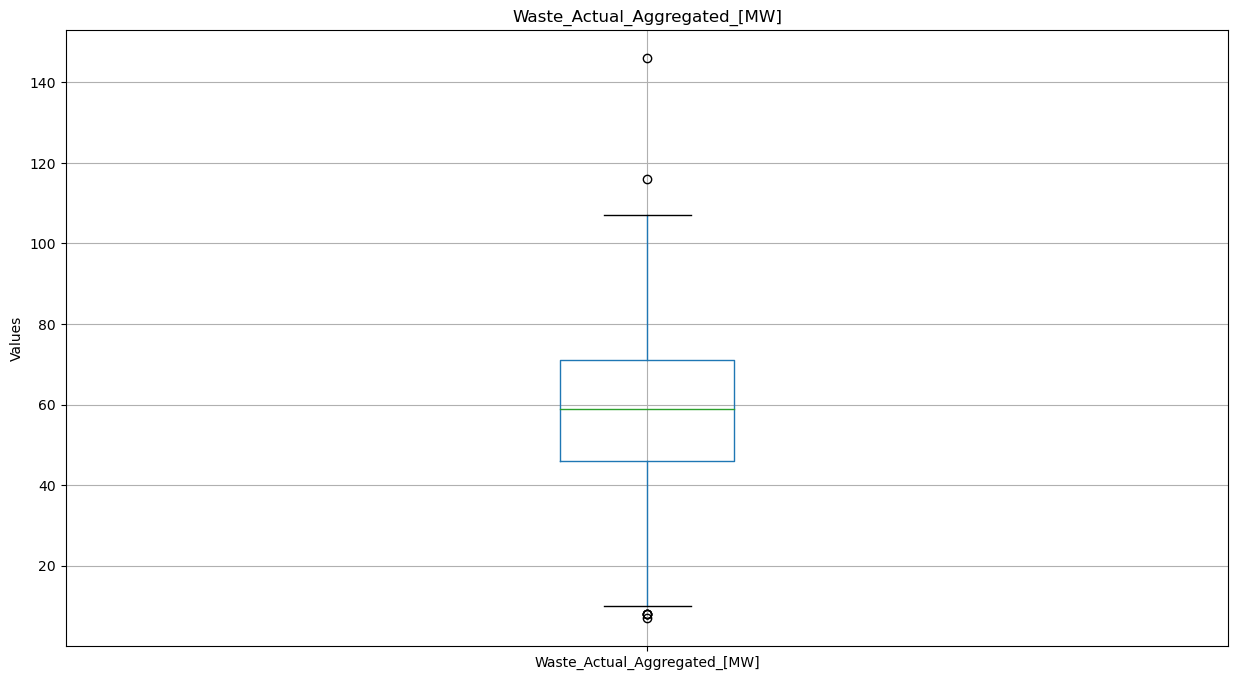

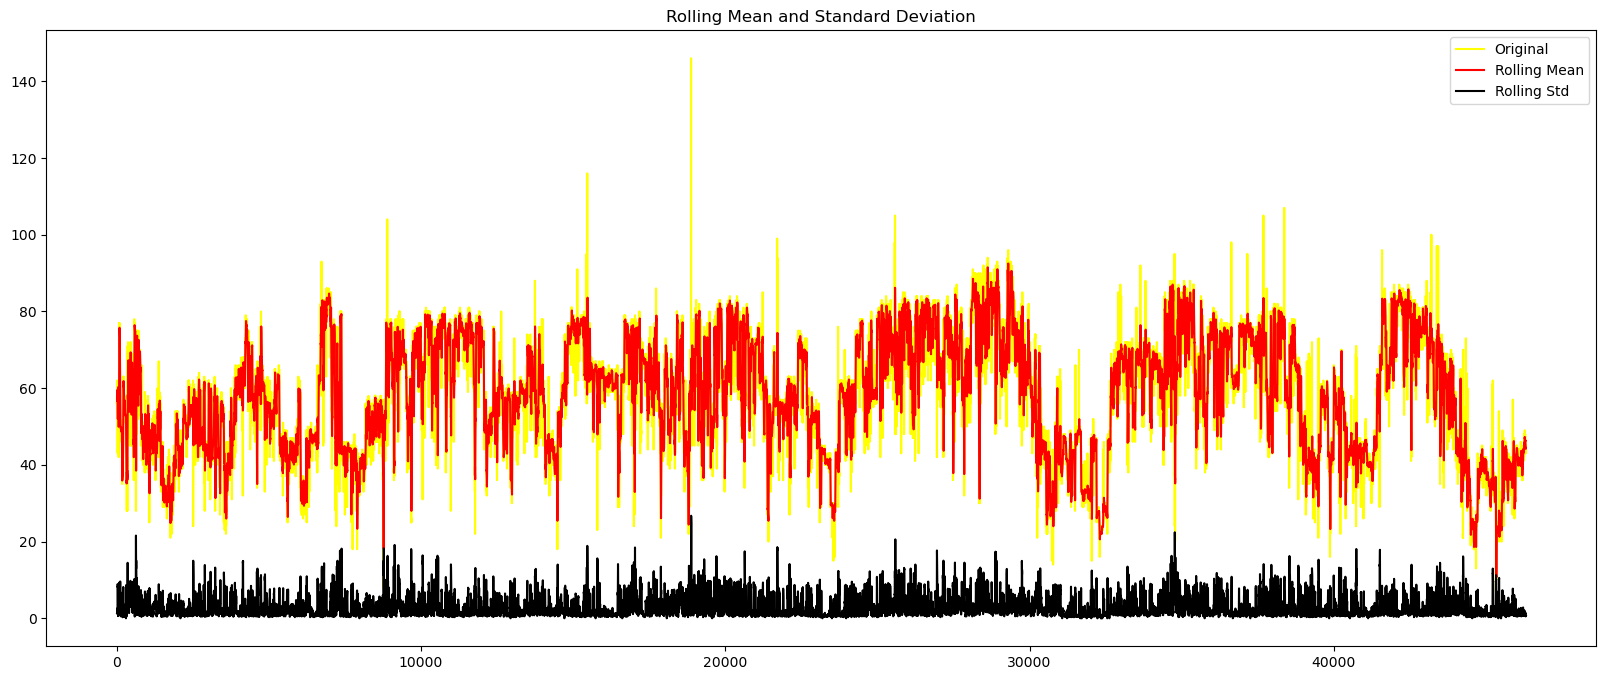

Results of dickey fuller test
Test Statistics               -9.138991e+00
p-value                        2.883482e-15
No. of lags used               5.600000e+01
Number of observations used    4.625600e+04
critical value (1%)           -3.430491e+00
critical value (5%)           -2.861602e+00
critical value (10%)          -2.566803e+00
dtype: float64


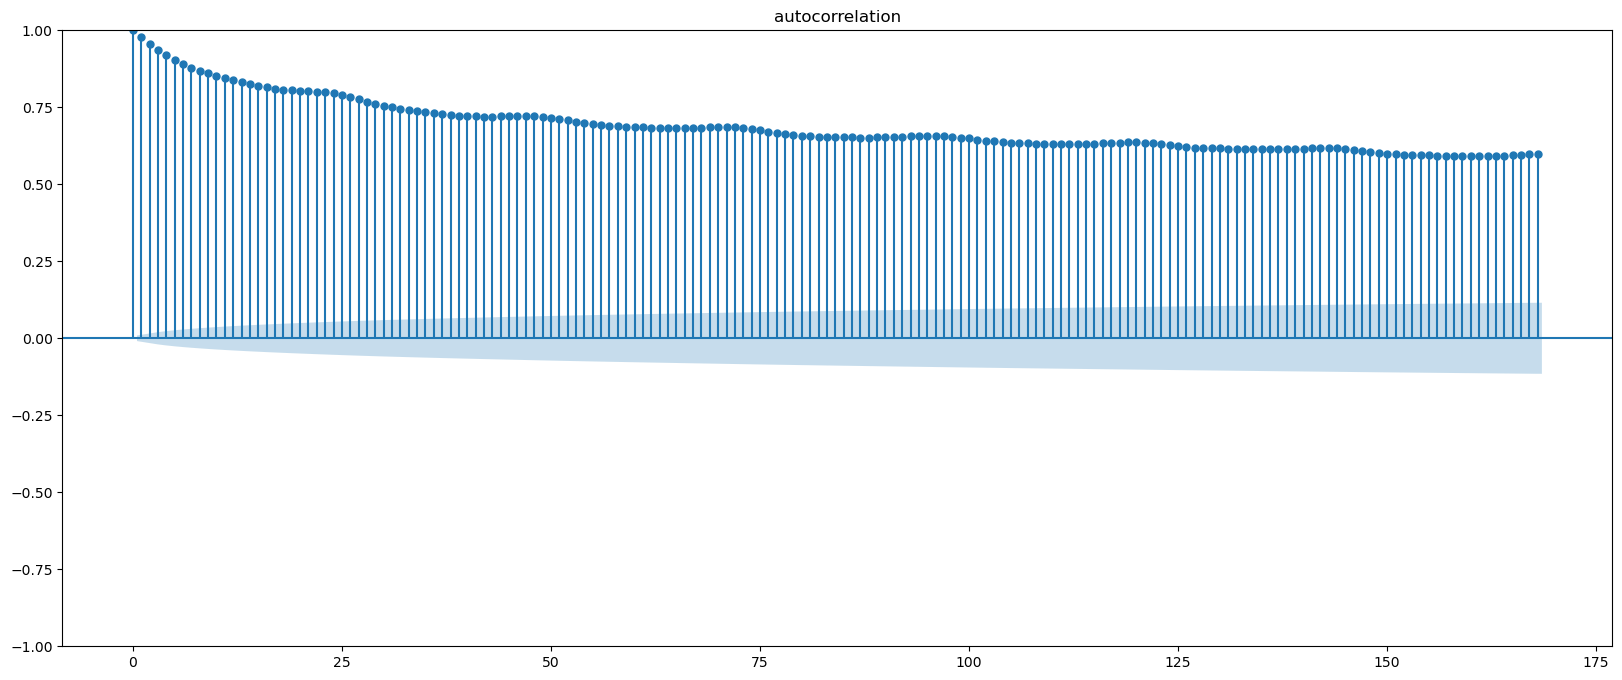

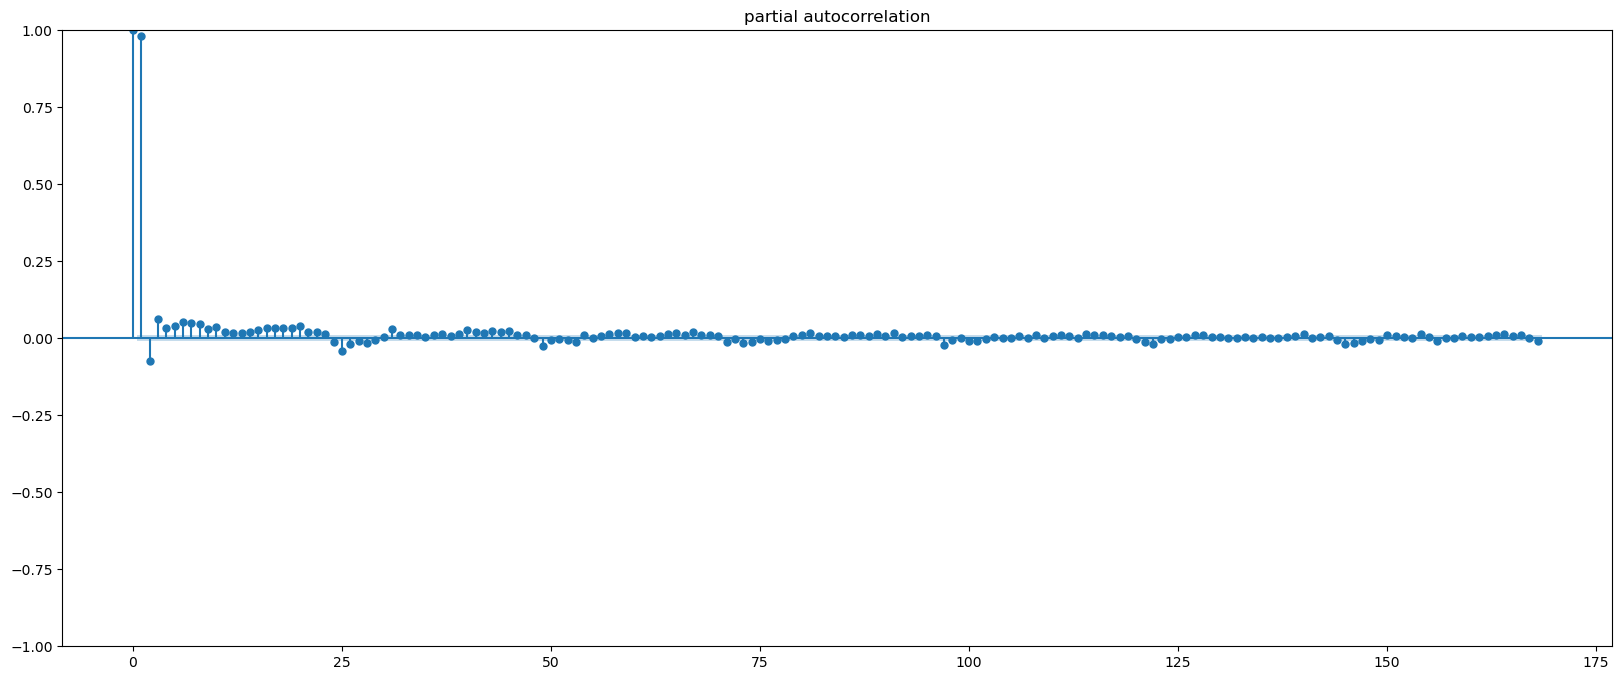

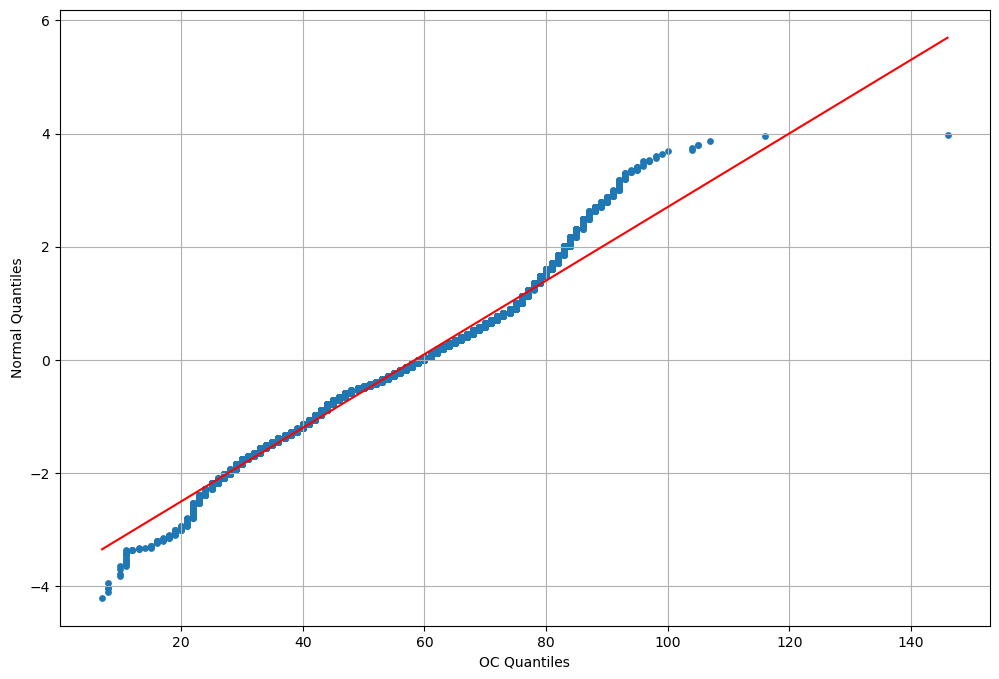

Kurtosis of Waste_Actual_Aggregated_[MW]:  -0.7150773603471459
Skewness of Waste_Actual_Aggregated_[MW]:  -0.21512989814886774
Jarque-Bera Result: Jarque_beraResult(statistic=1343.9629746199894, pvalue=0.0)
KPSS Statistic: 1.114614
p-value: 0.010000
#Lags used: 121
Critical Value (10%): 0.119000
Critical Value (5%): 0.146000
Critical Value (2.5%): 0.176000
Critical Value (1%): 0.216000


In [11]:
timing2(df,'Waste_Actual_Aggregated_[MW]',168)

# Green energy mix

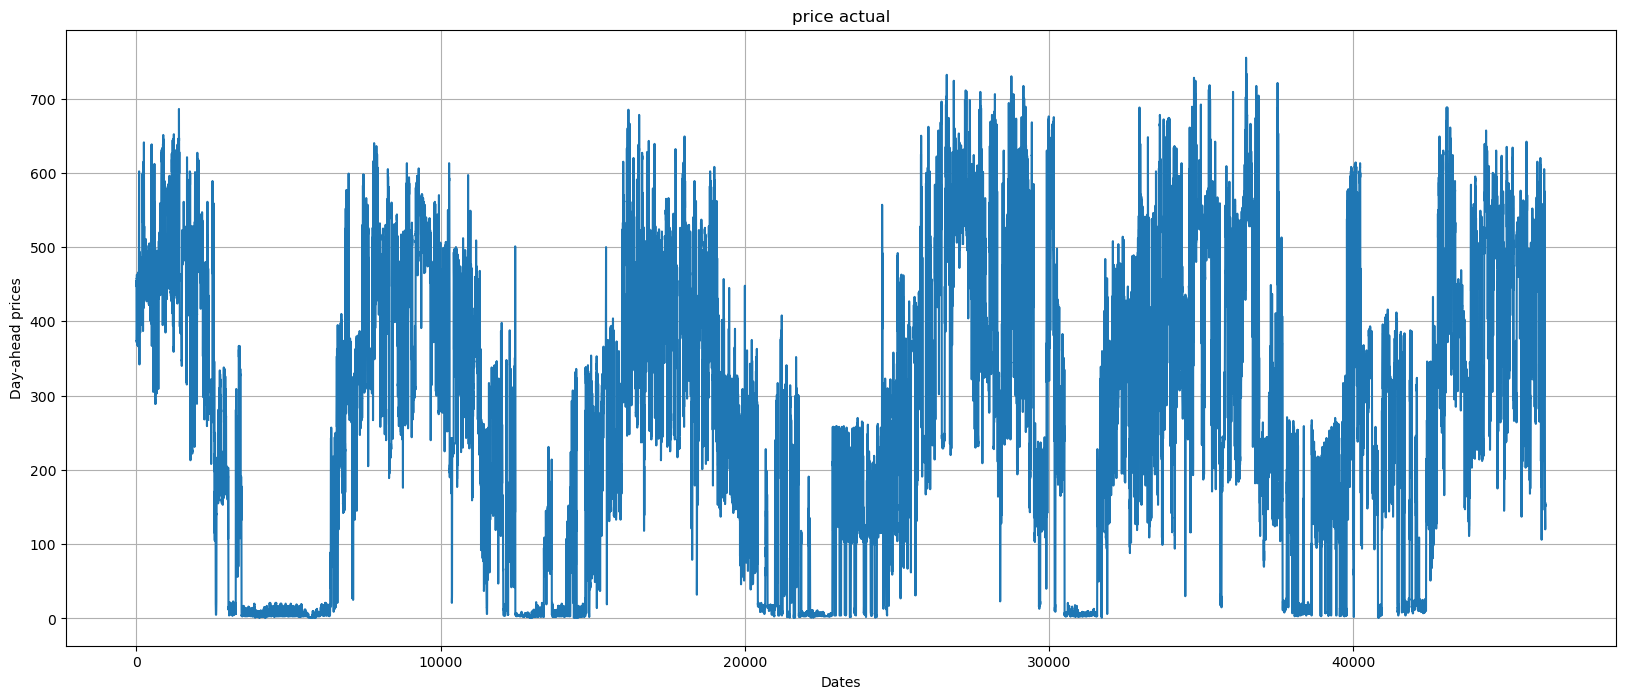

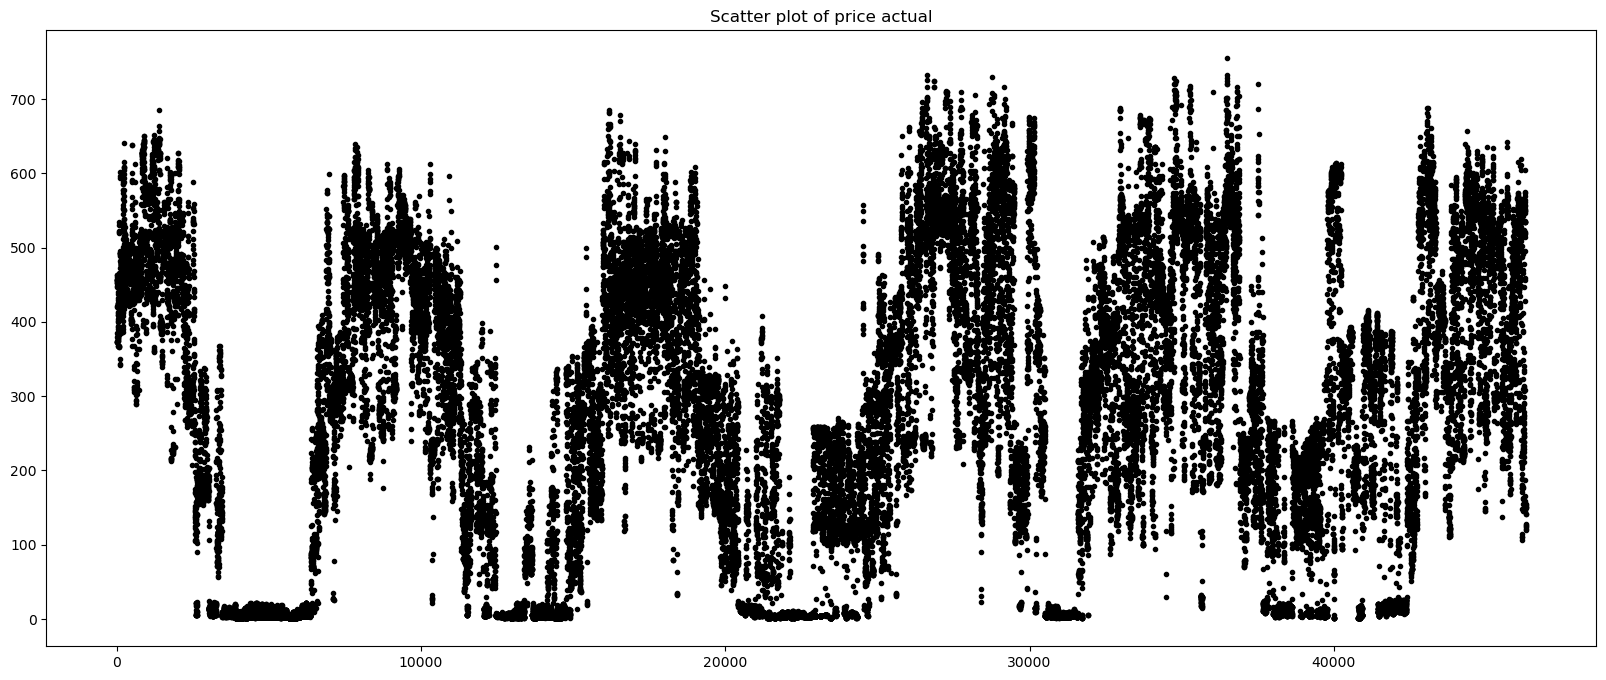

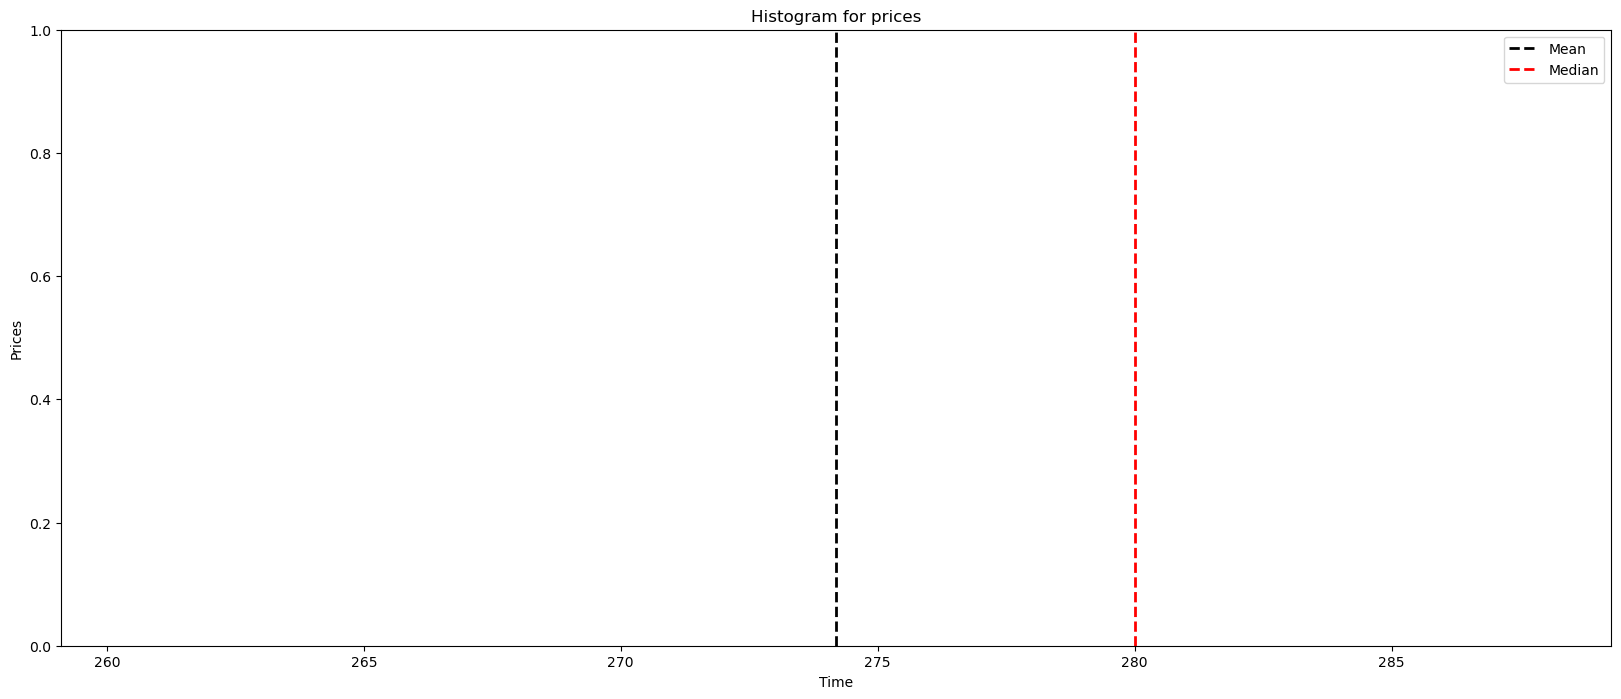

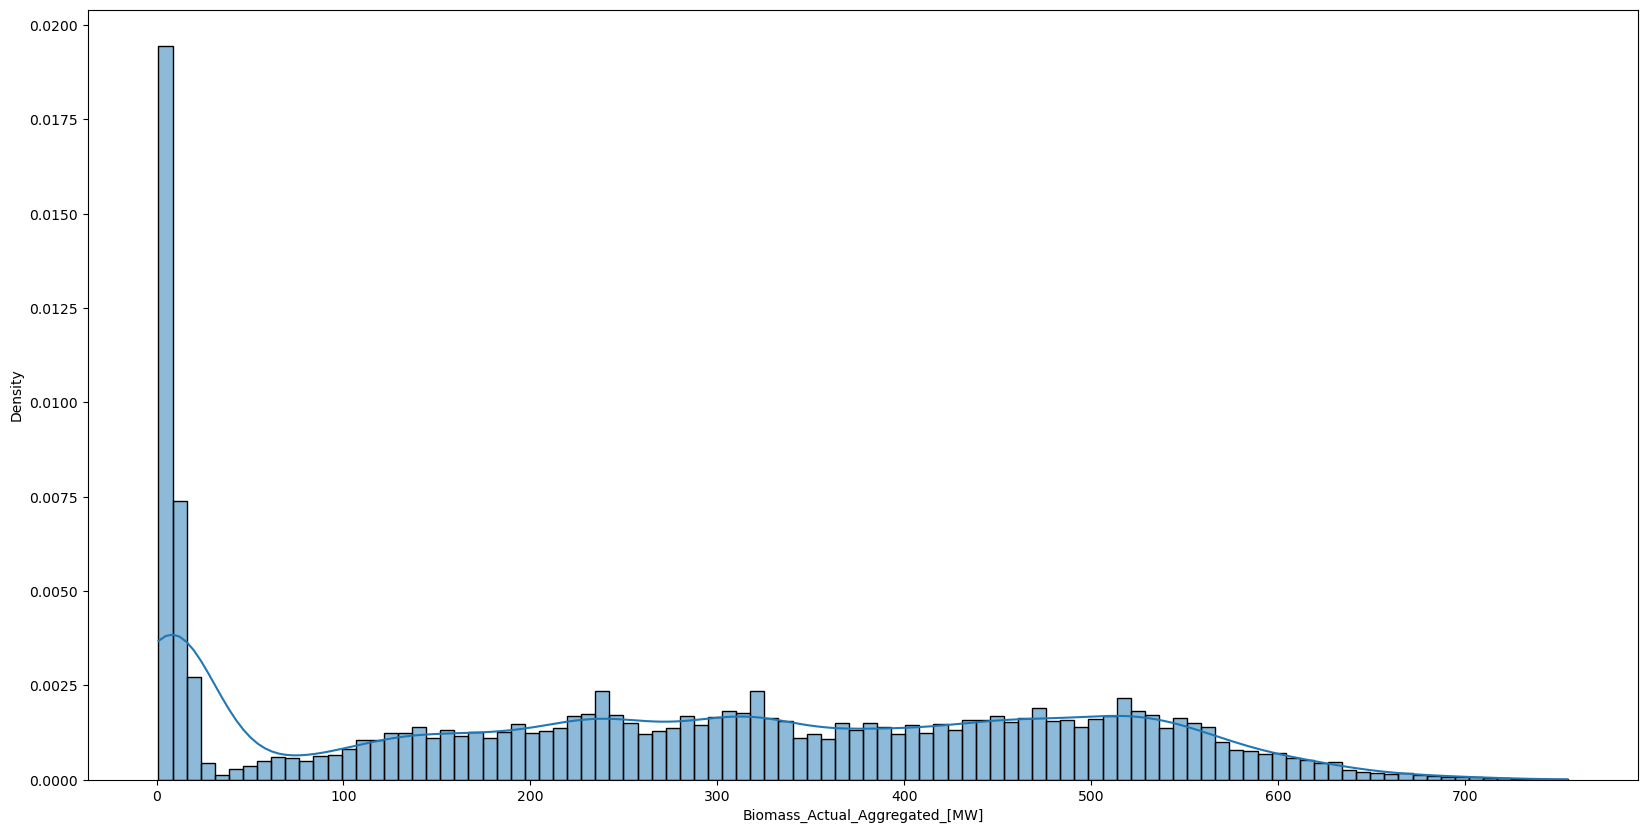

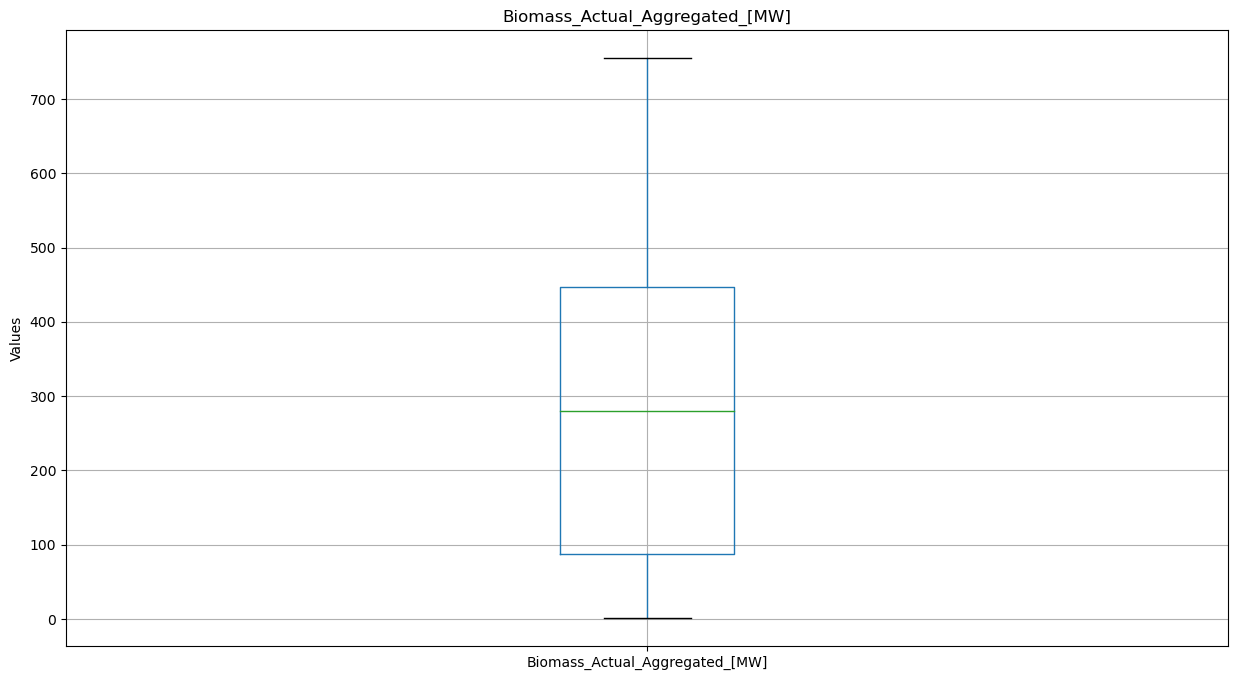

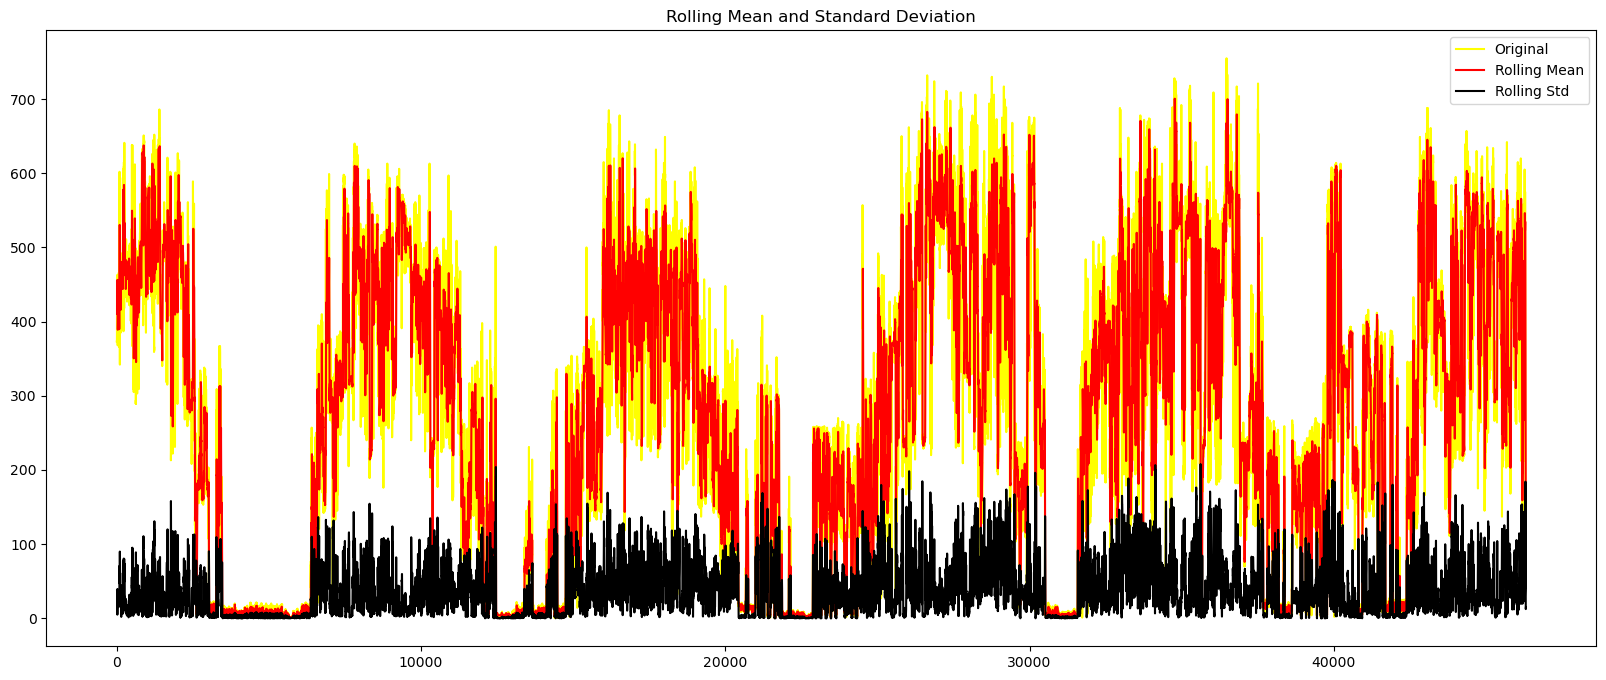

Results of dickey fuller test
Test Statistics               -8.051176e+00
p-value                        1.740401e-12
No. of lags used               5.600000e+01
Number of observations used    4.625600e+04
critical value (1%)           -3.430491e+00
critical value (5%)           -2.861602e+00
critical value (10%)          -2.566803e+00
dtype: float64


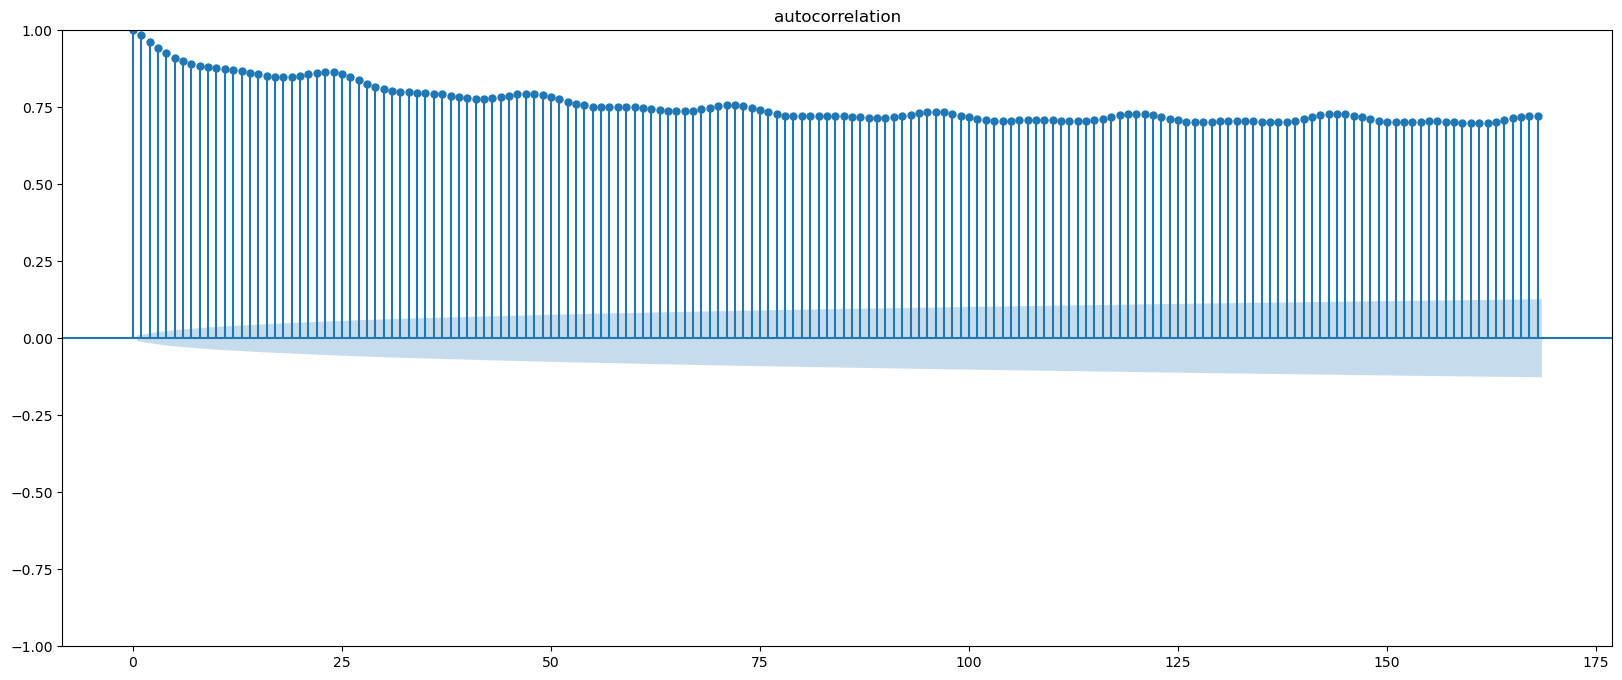

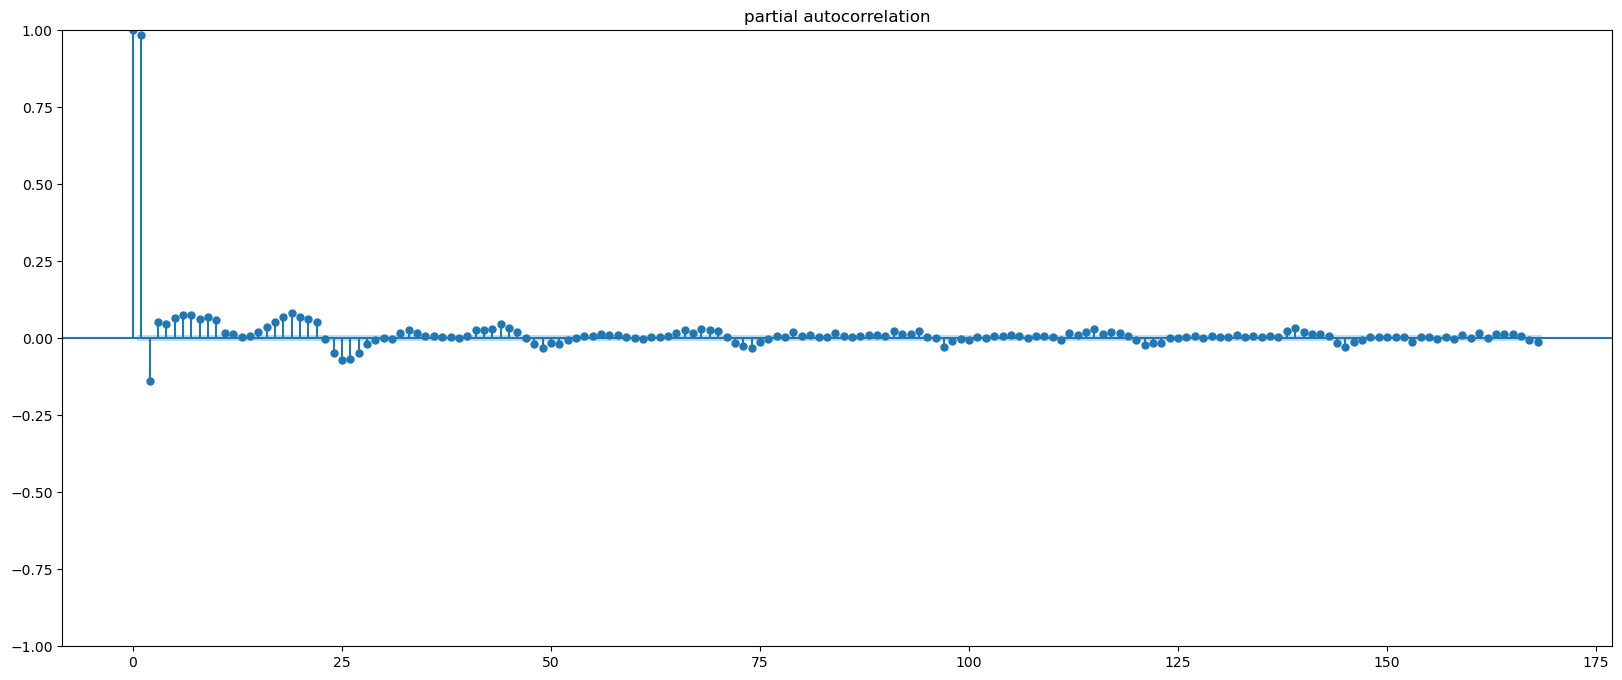

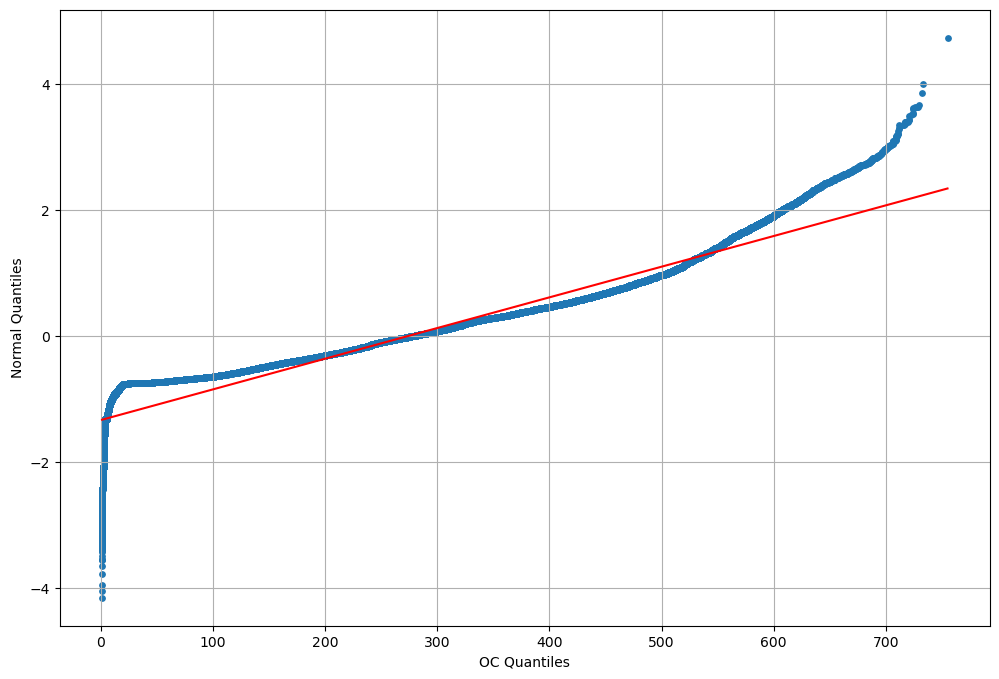

Kurtosis of Biomass_Actual_Aggregated_[MW]:  -1.2408427318648854
Skewness of Biomass_Actual_Aggregated_[MW]:  0.035994637240112246
Jarque-Bera Result: Jarque_beraResult(statistic=2981.154573864441, pvalue=0.0)
KPSS Statistic: 0.430183
p-value: 0.010000
#Lags used: 122
Critical Value (10%): 0.119000
Critical Value (5%): 0.146000
Critical Value (2.5%): 0.176000
Critical Value (1%): 0.216000


In [13]:
timing2(df,'Biomass_Actual_Aggregated_[MW]',168)

The green energy mix plot contains some patterns. Specifically, the values seem to drop around the end of each year, around the holiday period. moreover, the mean and the median values are really close to each other, which means that the distribution of values is quite symmetrical and that there will be a small number of outliers in the dataset. This can be seen from the boxplot as well.

# TTF price

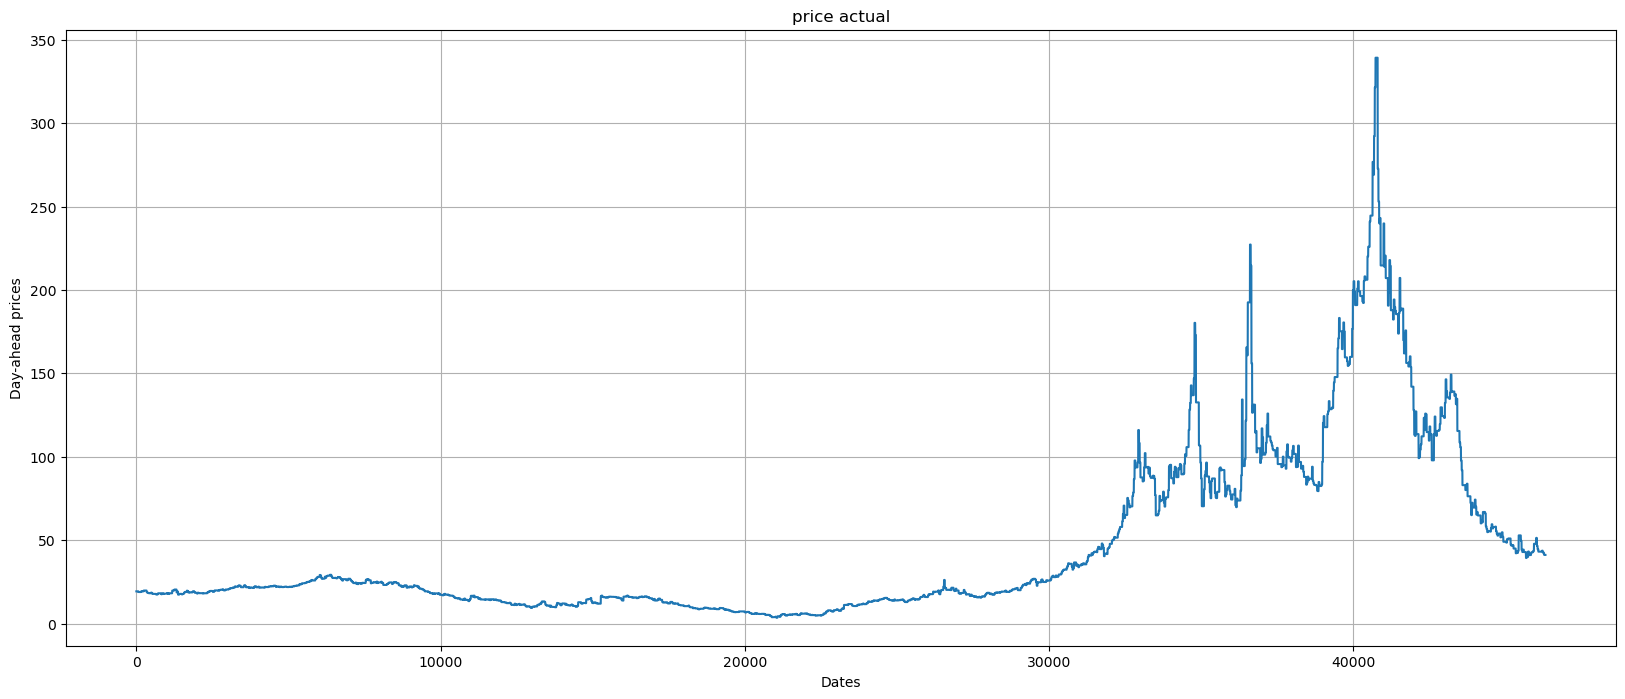

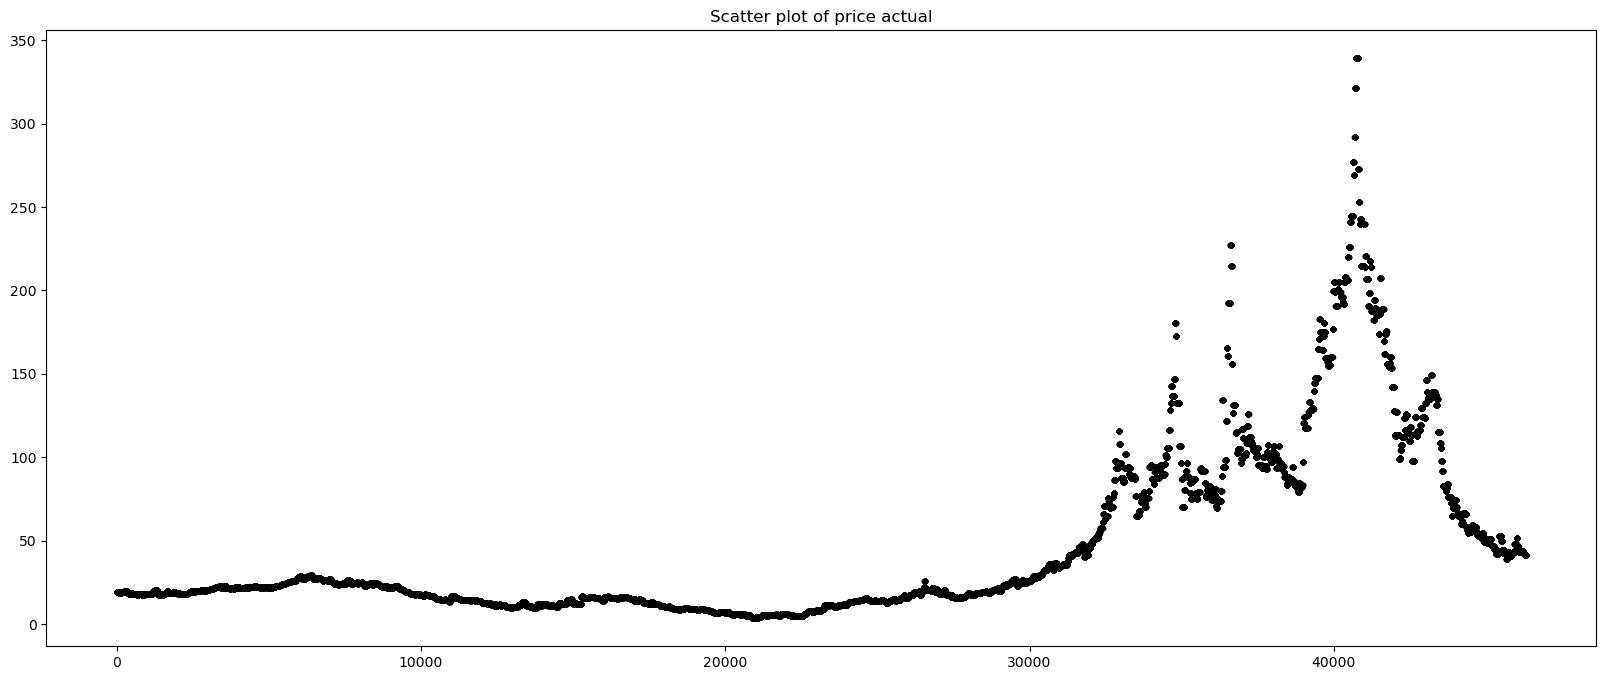

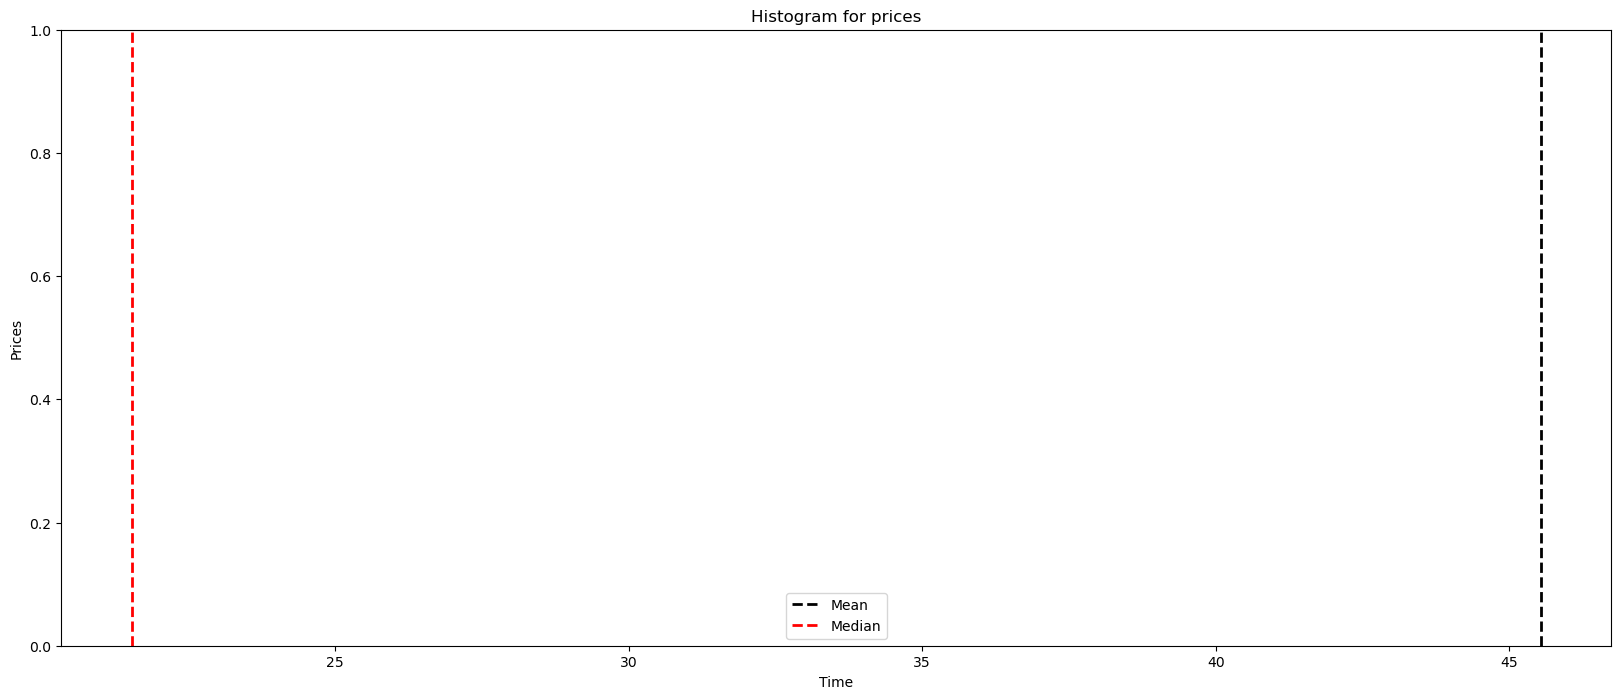

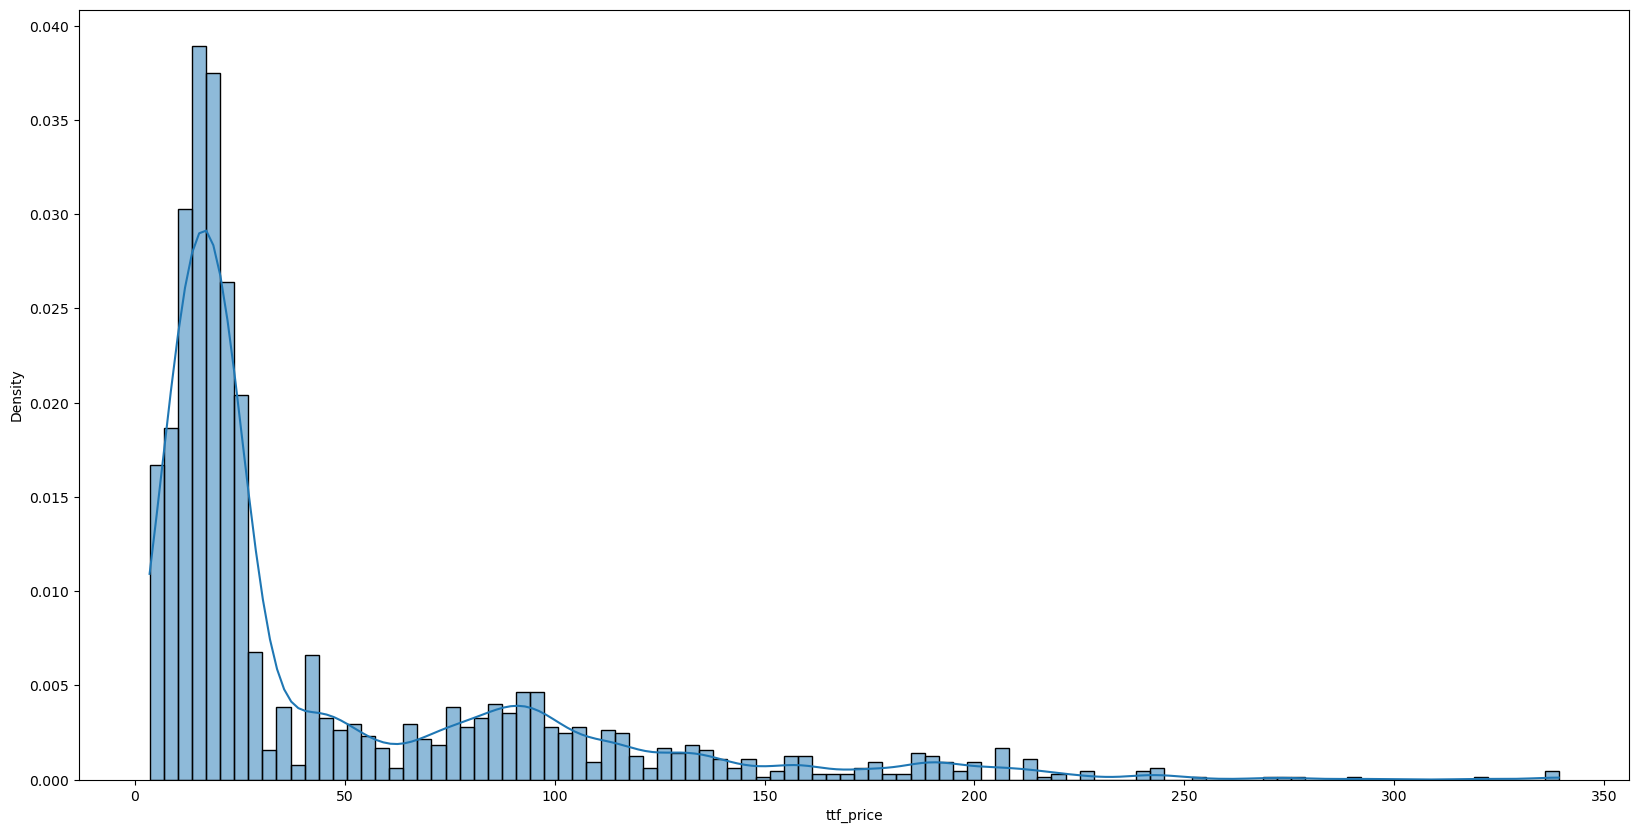

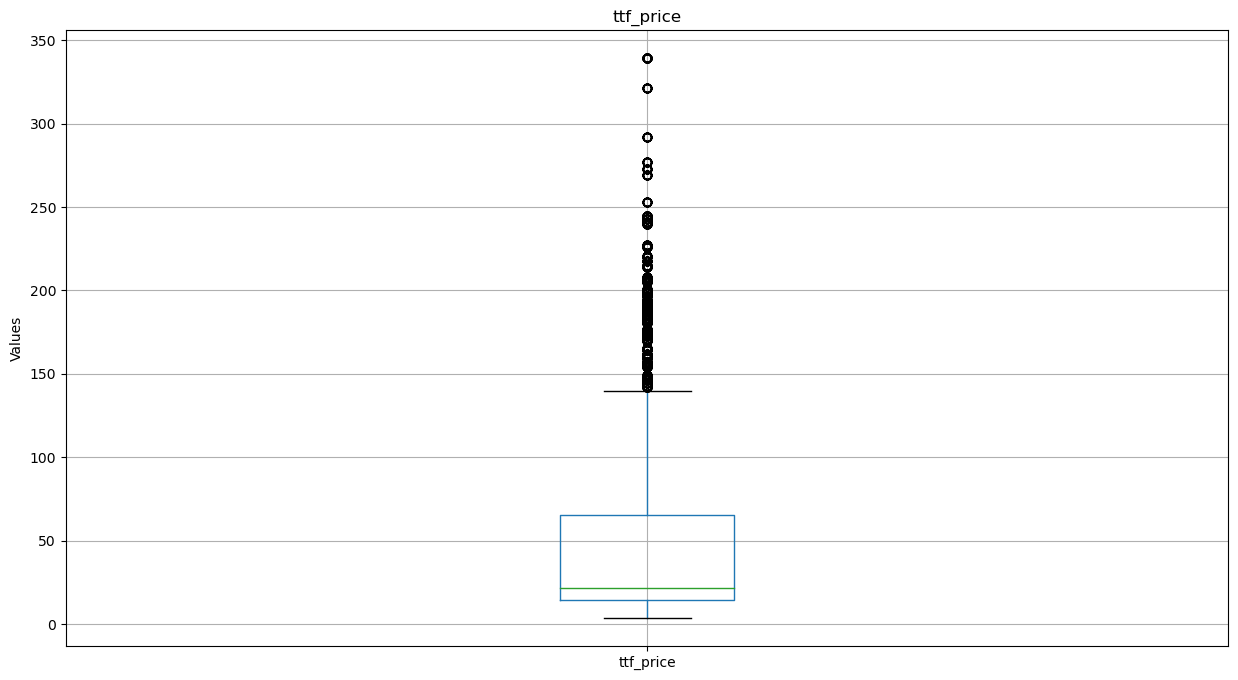

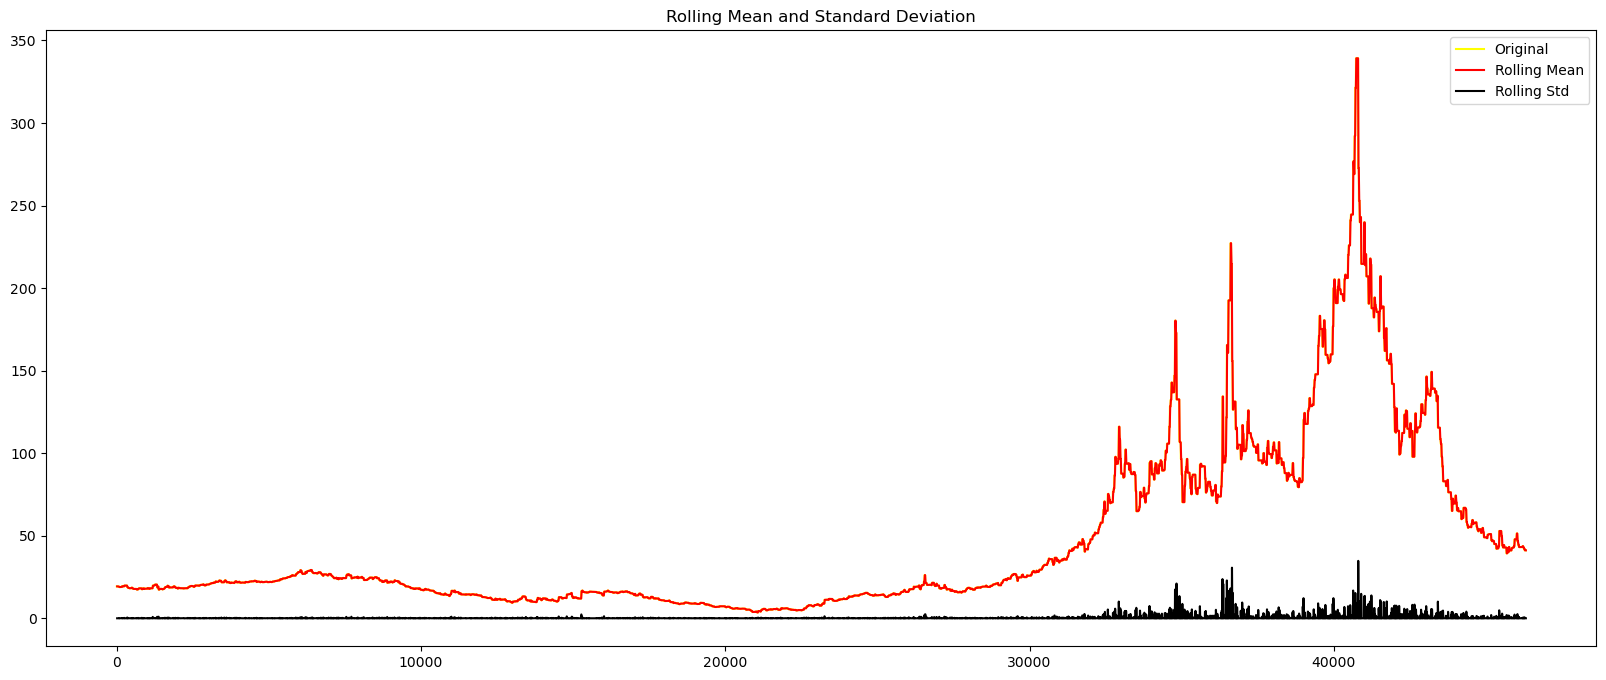

Results of dickey fuller test
Test Statistics                   -2.205611
p-value                            0.204215
No. of lags used                  48.000000
Number of observations used    46264.000000
critical value (1%)               -3.430491
critical value (5%)               -2.861602
critical value (10%)              -2.566803
dtype: float64


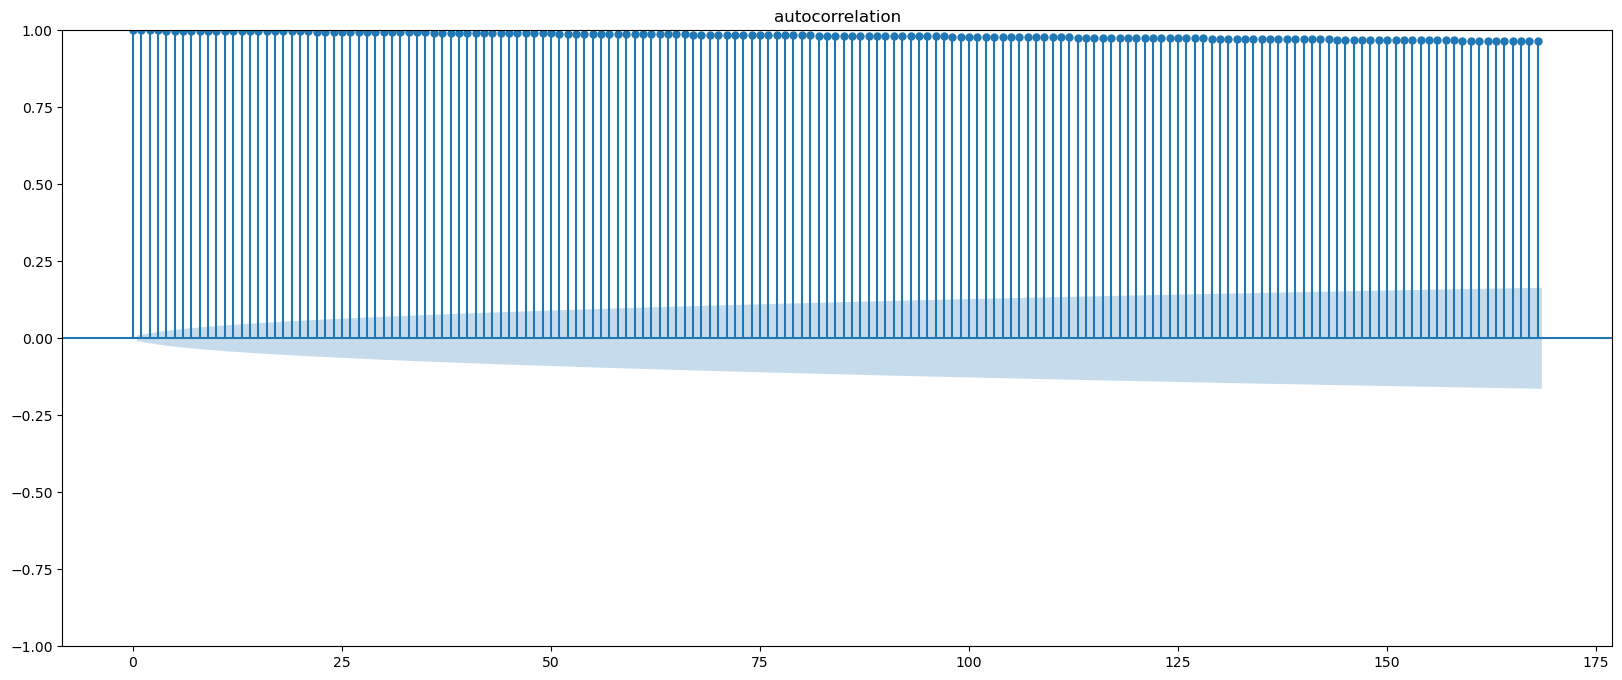

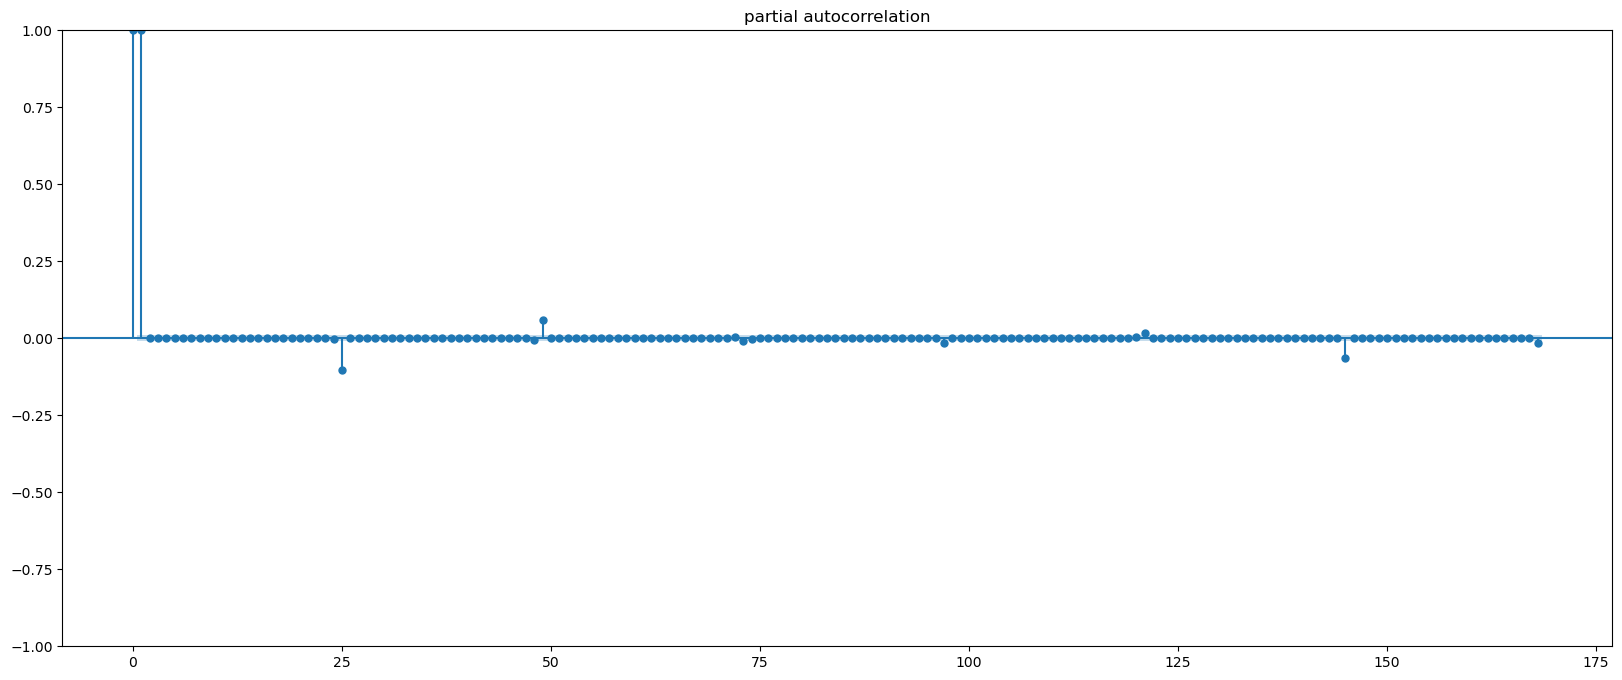

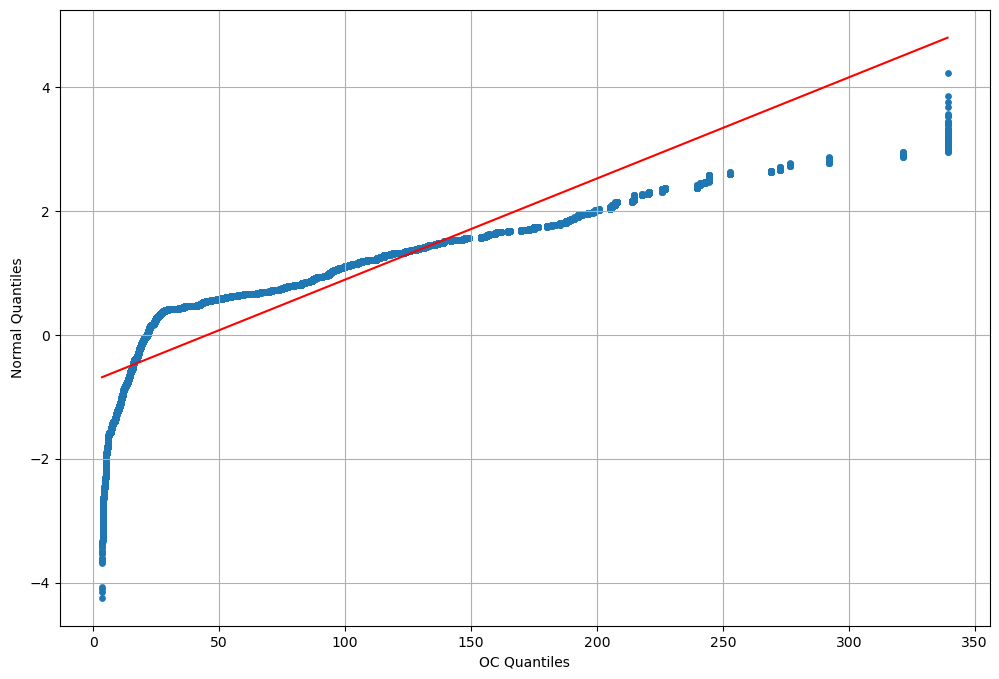

Kurtosis of ttf_price:  4.378453217486802
Skewness of ttf_price:  2.0231286423232597
Jarque-Bera Result: Jarque_beraResult(statistic=68587.72091807271, pvalue=0.0)
KPSS Statistic: 3.824362
p-value: 0.010000
#Lags used: 123
Critical Value (10%): 0.119000
Critical Value (5%): 0.146000
Critical Value (2.5%): 0.176000
Critical Value (1%): 0.216000


In [12]:
timing2(df,'ttf_price',168)

# Splitting

## Option 1 - sklearn function

In [3]:
tscv = TimeSeriesSplit(gap = 24*30*0, n_splits = 3, test_size = 24*30*3, max_train_size = df.shape[0])
# gap: observations between train and test set -> 0 months
# n_splits: # of folds
# test_size: observations for test set -> 3 months
print(tscv)

NameError: name 'df' is not defined

Fold 0:
  Train: index = [    0     1     2 ... 39830 39831 39832]
  Test:  index = [39833 39834 39835 ... 41990 41991 41992]


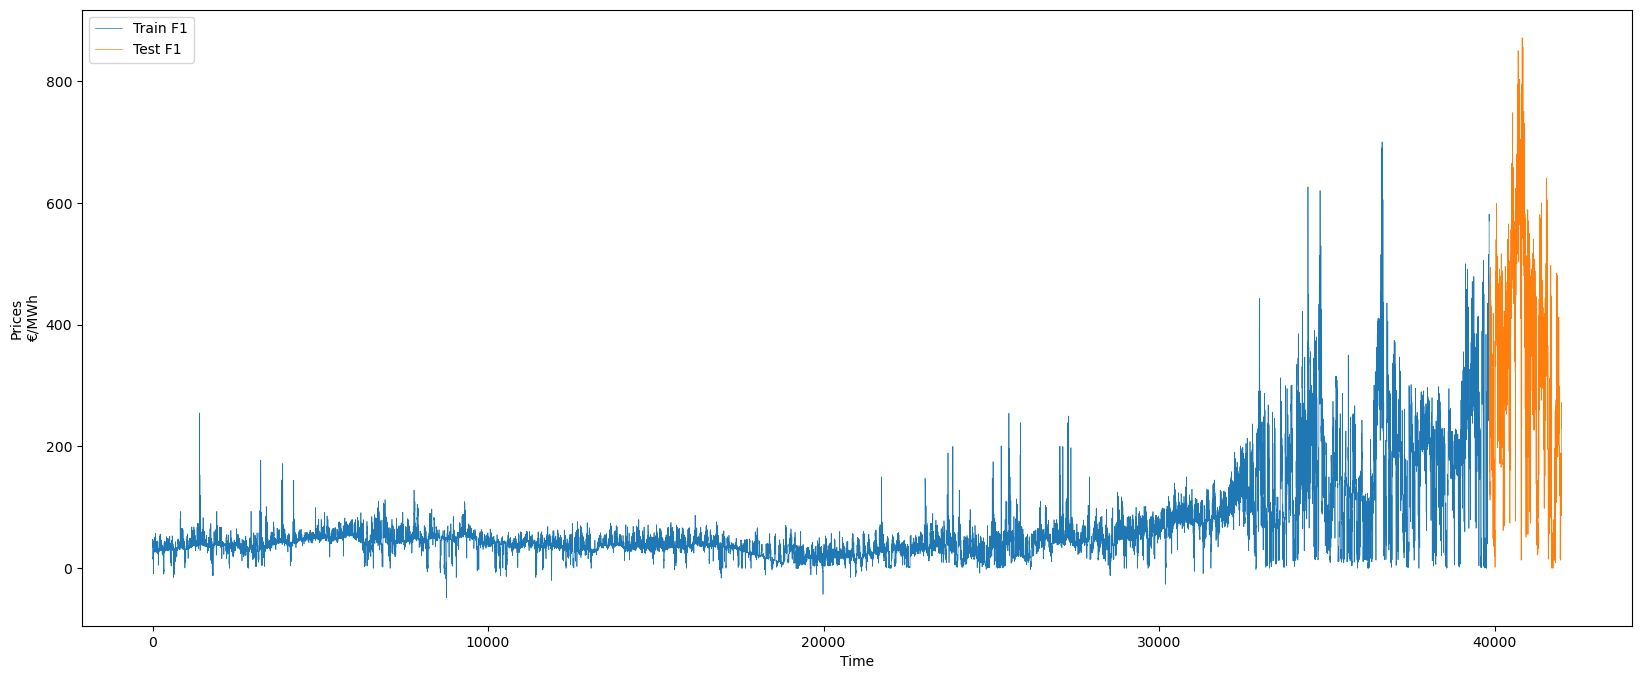

Fold 1:
  Train: index = [    0     1     2 ... 41990 41991 41992]
  Test:  index = [41993 41994 41995 ... 44150 44151 44152]


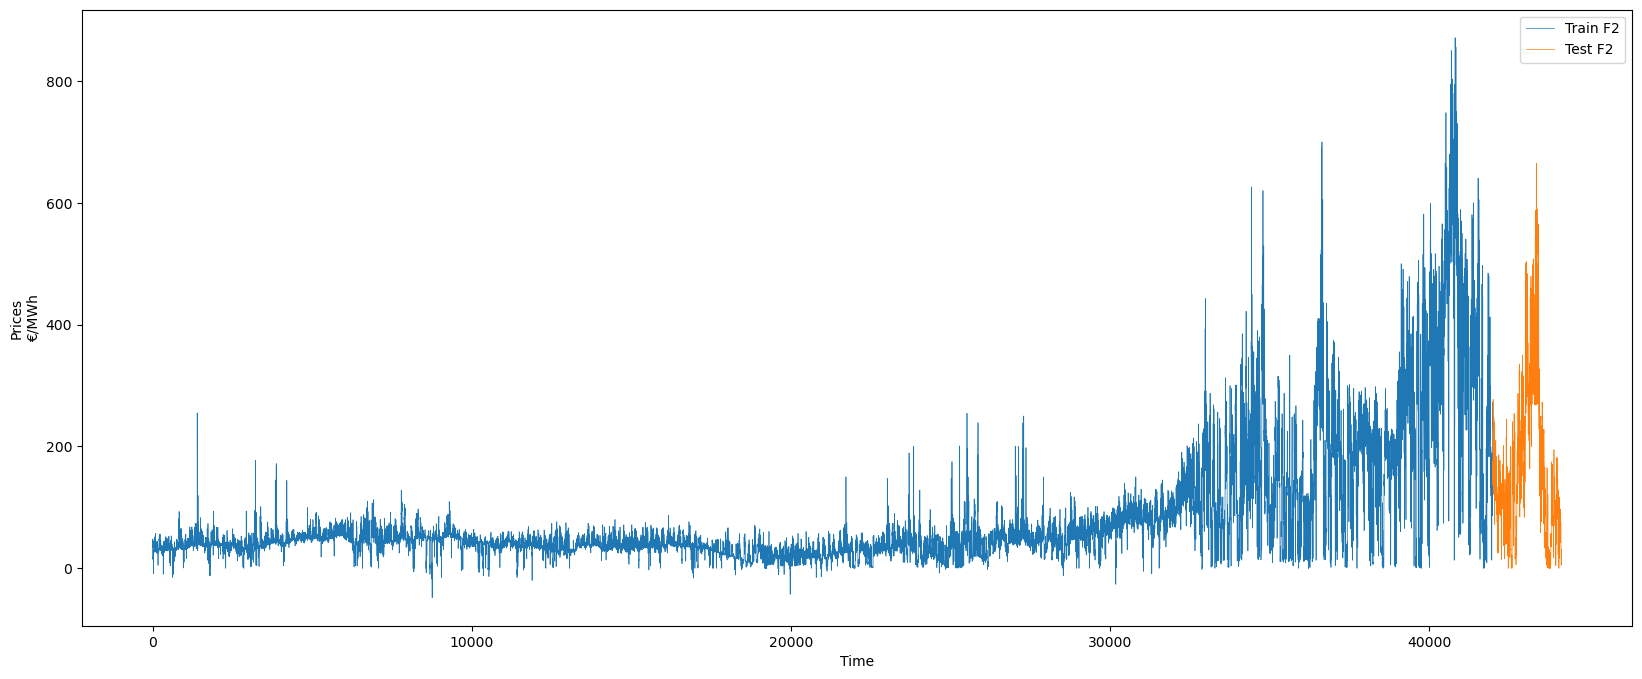

Fold 2:
  Train: index = [    0     1     2 ... 44150 44151 44152]
  Test:  index = [44153 44154 44155 ... 46310 46311 46312]


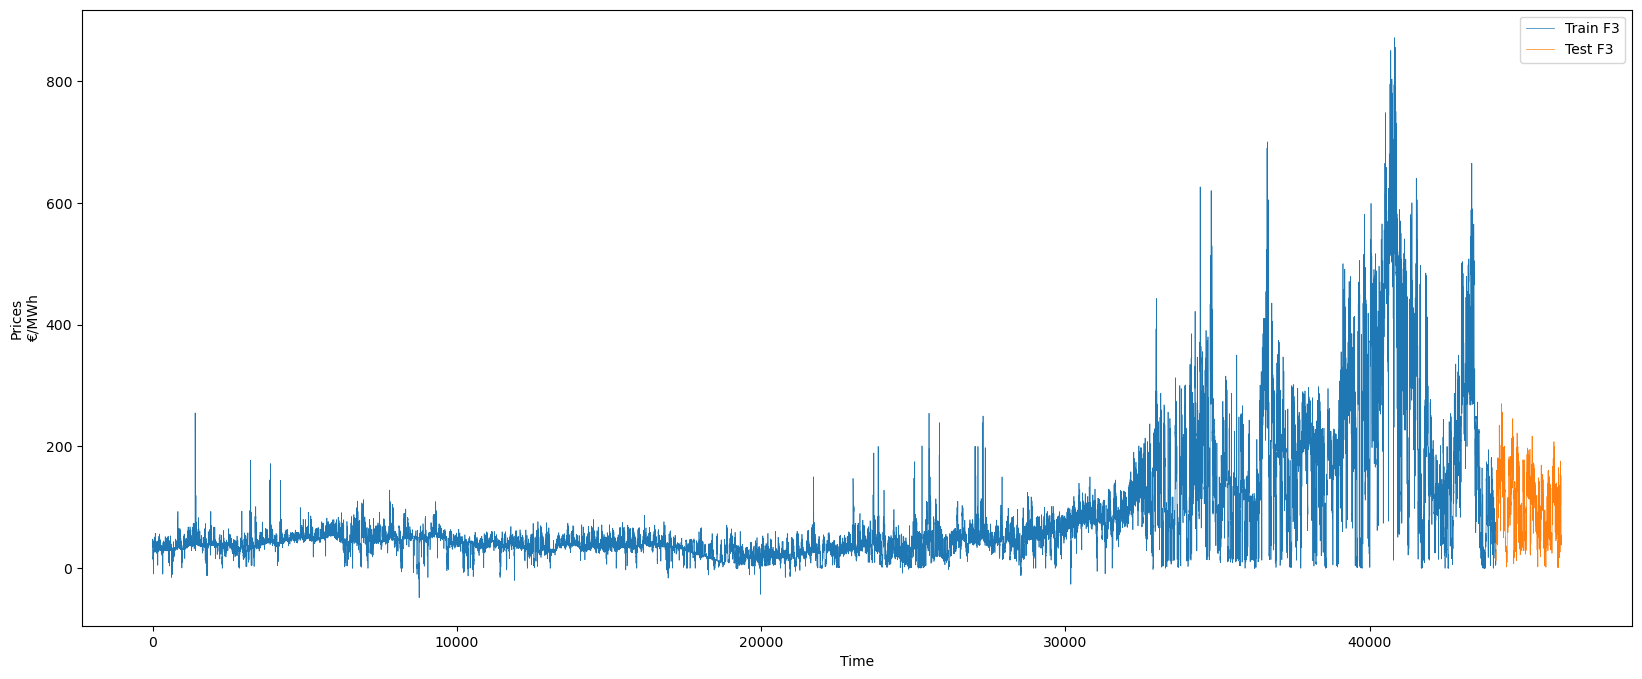

In [23]:
for i, (train_index, test_index) in enumerate(tscv.split(df['Timestamp'])):
    print(f"Fold {i}:")
    print(f"  Train: index = {train_index}")
    print(f"  Test:  index = {test_index}")
    
    X_train = df.iloc[train_index].copy()
    X_test = df.iloc[test_index].copy()
    
    plt.plot(X_train['Day_Ahead_price'], label = 'Train F'+str(i+1), linewidth = 0.5)
    plt.plot(X_test['Day_Ahead_price'], label = 'Test F'+str(i+1), linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('Prices\n€/MWh')
    plt.legend()
    plt.show()


## Option 2 - manually

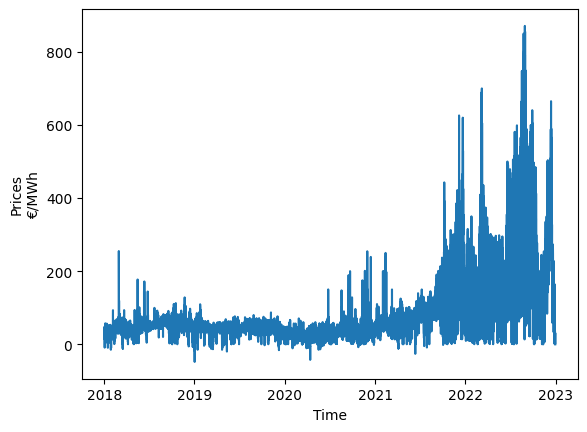

In [7]:
plt.plot(df['Timestamp'], df['Day_Ahead_price'])
plt.xlabel('Time')
plt.ylabel('Prices\n€/MWh')
plt.show()

Fold 1: train 01/01/2018 - 31/12/2020, test 01/01/2021 - 31/03/2021<br>
Fold 2: train 01/01/2018 - 30/06/2021, test 01/07/2021 - 30/09/2021<br>
Fold 3: train 01/01/2017 - 31/08/2022, test 01/09/2022 - 31/12/2022

In [8]:
train_start = ['2018-01-01', '2018-01-01', '2018-01-01']
train_end = ['2020-12-31', '2021-06-20', '2022-08-31']

test_start = ['2021-01-01', '2021-07-01', '2022-09-01']
test_end = ['2021-03-31', '2021-09-30', '2022-12-31']

In [9]:
df2 = df.set_index('Timestamp')

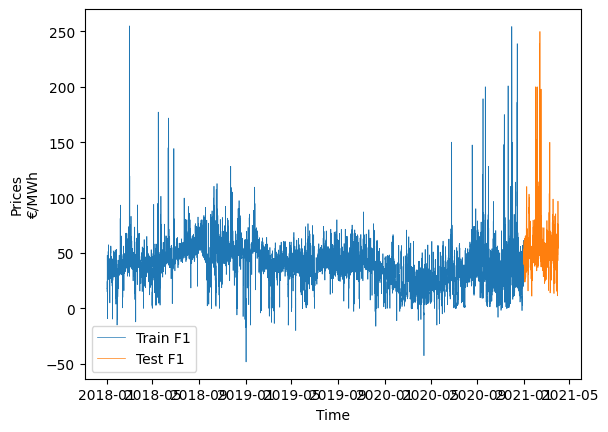

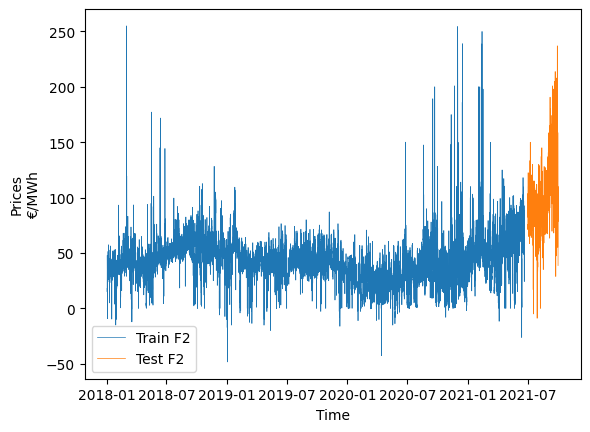

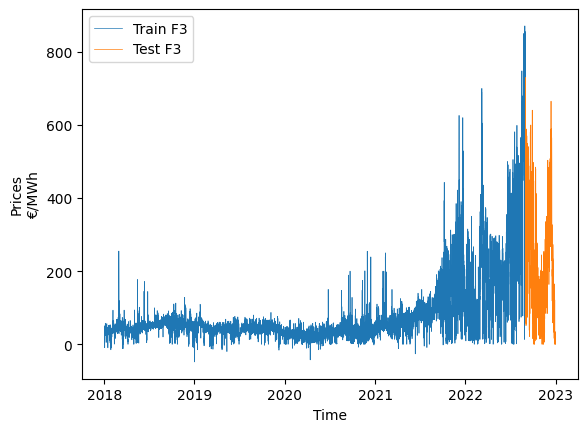

In [10]:
i = 1
for tr_s, tr_e, te_s, te_e in (zip(train_start, train_end, test_start, test_end)):
    
    X_train, X_test = split_timeseries(df2, tr_s, tr_e, te_s, te_e)
    
    plt.plot(X_train['Day_Ahead_price'], label = 'Train F'+str(i), linewidth = 0.5)
    plt.plot(X_test['Day_Ahead_price'], label = 'Test F'+str(i), linewidth = 0.5)
    plt.xlabel('Time')
    plt.ylabel('Prices\n€/MWh')
    plt.legend()
    plt.show()
    
    i += 1